## Analiza letalskih nesreč

#### Priprava podatkov

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from collections import defaultdict

PlaneCrashes = "./Podatki/PlaneCrashes.csv"
reader = csv.DictReader(open(PlaneCrashes, 'rt', encoding='utf-8'))

### 1. Kako se število nesreč spreminja skozi čas?

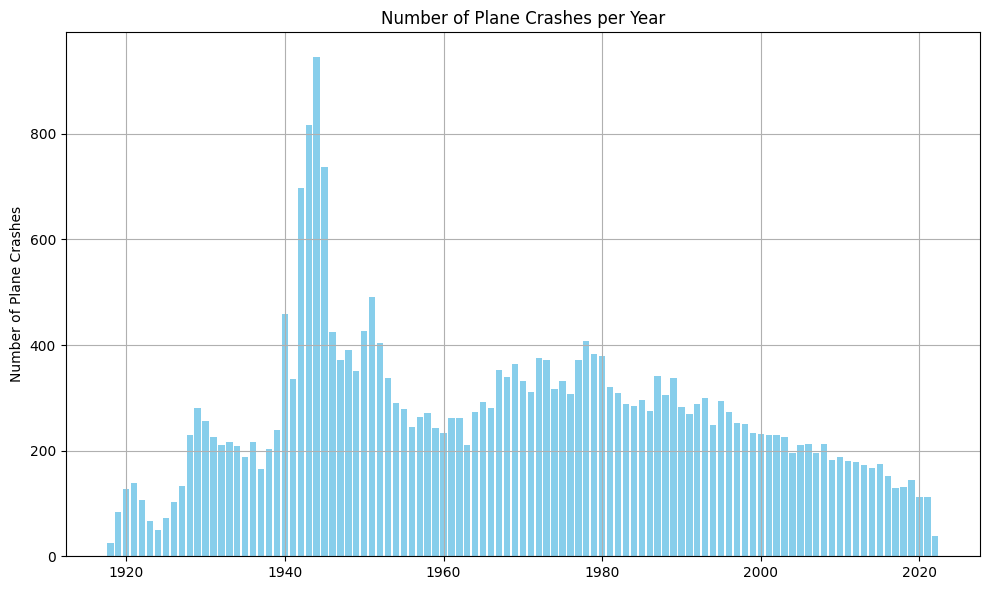

In [2]:
types = {}
for row in reader:
    flight_type = row['Flight type']
    if flight_type.strip():
        types[flight_type] = types.get(flight_type, 0) + 1
    else:
        types['NA'] = types.get('NA', 0) + 1

sorted_types = sorted(types.keys(), key=lambda k: types[k], reverse=True)

flight_types_dict = {}
top_10_types = set(sorted_types[:10])

total_years = defaultdict(int)

for type in top_10_types:
    flight_types_dict[type] = defaultdict(int)

reader = csv.DictReader(open("./Podatki/PlaneCrashes.csv", 'rt', encoding='utf-8'))

for row in reader:
    datum = datetime.strptime(row['Date'], '%Y-%m-%d %H:%M:%S')
    flight_type = row['Flight type']
    if (flight_type in top_10_types):
        flight_types_dict[flight_type][datum.year] += 1
    total_years[datum.year] += 1

x = list(total_years.keys())
y_total = [total_years[year] for year in x]

plt.figure(figsize=(10, 6))

plt.ylabel('Number of Plane Crashes')
plt.title('Number of Plane Crashes per Year')

bars_total_crashes = plt.bar(x, y_total, color='skyblue', label='Total Crashes')

plt.grid(True)

plt.tight_layout()

plt.show()

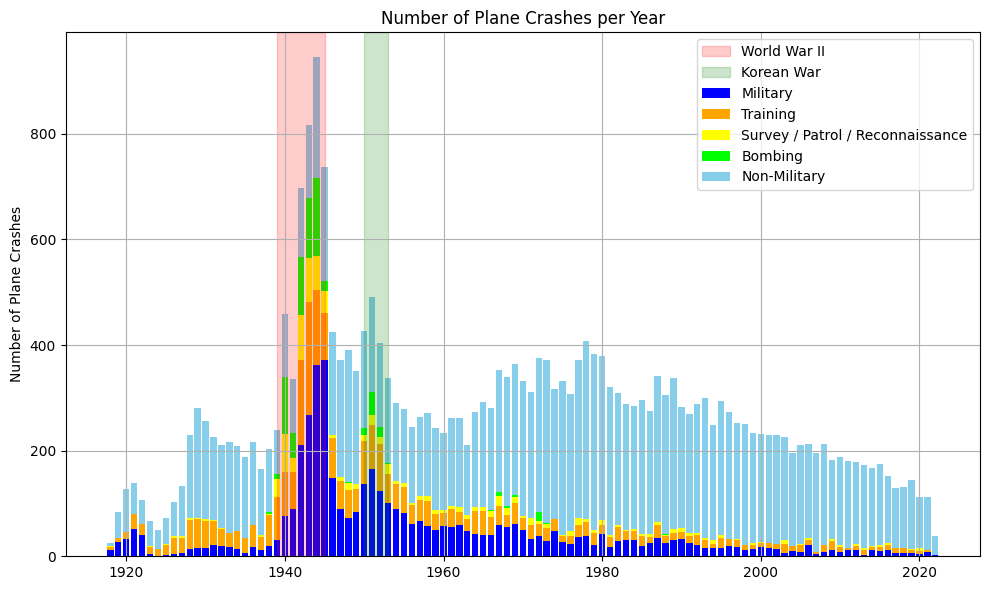

In [3]:
y_military = [flight_types_dict["Military"][year] for year in x]
y_training = [flight_types_dict["Training"][year] for year in x]
y_bombing = [flight_types_dict["Bombing"][year] for year in x]
y_survey = [flight_types_dict["Survey / Patrol / Reconnaissance"][year] for year in x]

plt.figure(figsize=(10, 6))

bars_military = plt.bar(x, y_military, color='blue', label='Military')
bars_training = plt.bar(x, y_training, bottom=y_military, color='orange', label='Training')
bars_survey = plt.bar(x, y_survey, bottom=np.array(y_military) + np.array(y_training), color='yellow', label='Survey / Patrol / Reconnaissance')
bars_bombing = plt.bar(x, y_bombing, bottom=np.array(y_military) + np.array(y_training) + np.array(y_survey), color='lime', label='Bombing')

non_military_y = np.array(y_total) - np.array(y_military) - np.array(y_training) - np.array(y_bombing) - np.array(y_survey)
non_military_bottom = np.array(y_military) + np.array(y_training) + np.array(y_bombing) + np.array(y_survey)
bars_non_military = plt.bar(x, non_military_y, bottom=non_military_bottom, color='skyblue', label='Non-Military')


important_events = {
    "World War II": (1939, 1945),
    "Korean War": (1950, 1953)
}

colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'cyan', 'magenta', 'yellow', 'lime', 'pink', 'teal', 'lavender']
color_map = {event: color for event, color in zip(important_events.keys(), colors)}

for event, years_range in important_events.items():
    plt.axvspan(years_range[0], years_range[1], color=color_map[event], alpha=0.2)

legend_labels = []

for event in important_events.keys():
    legend_labels.append(event)

legend_labels.extend(['Military', 'Training', 'Survey / Patrol / Reconnaissance', 'Bombing', 'Non-Military'])

plt.ylabel('Number of Plane Crashes')
plt.title('Number of Plane Crashes per Year')

plt.grid(True)
plt.legend(legend_labels, loc='upper right')

plt.tight_layout()
plt.show()

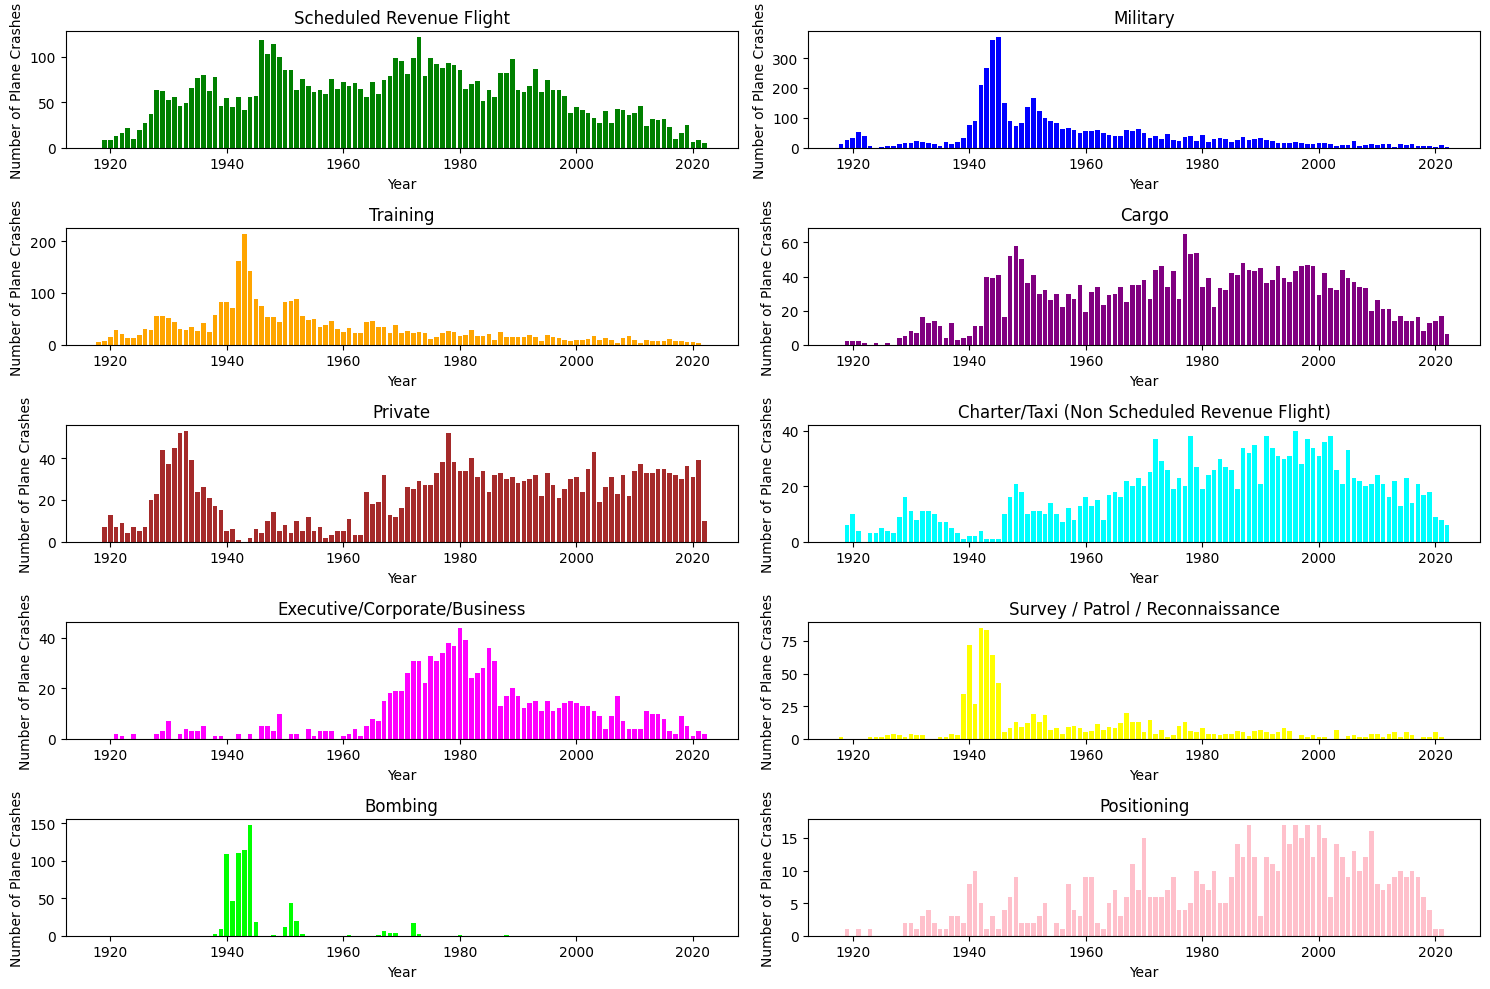

In [4]:
top_10_types = sorted_types[:10]

plt.figure(figsize=(15, 10))

for i, type in enumerate(top_10_types, 1):
    plt.subplot(5, 2, i)
    for year in x:
        plt.bar(year, flight_types_dict[type][year], color=colors[i])
    plt.title(type)
    plt.xlabel('Year')
    plt.ylabel('Number of Plane Crashes')

plt.tight_layout()
plt.show()

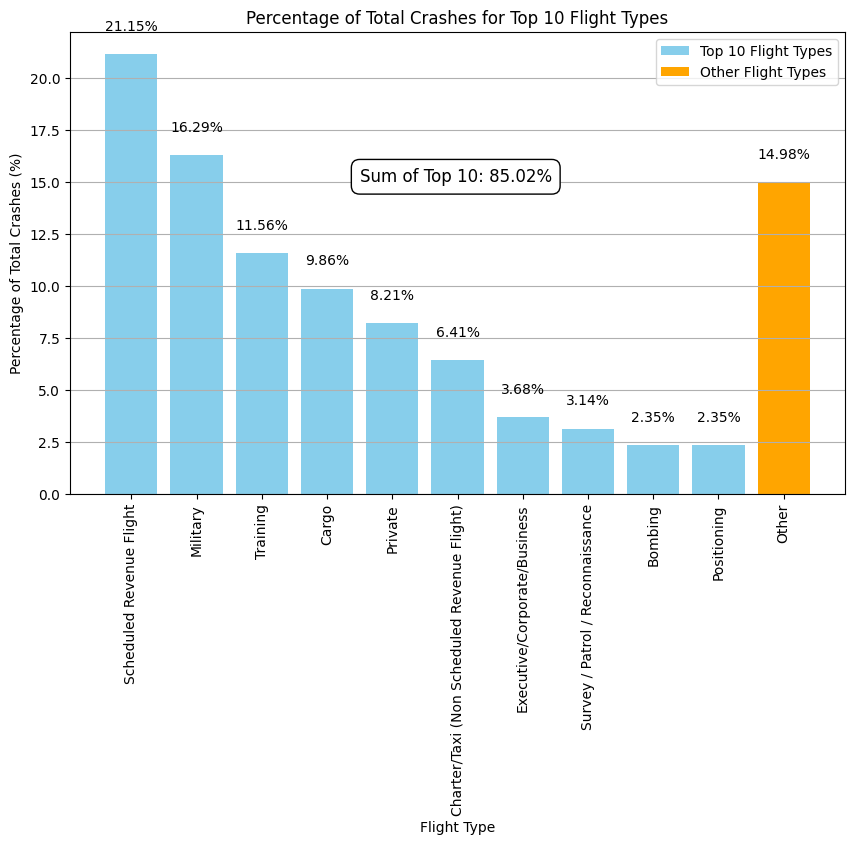

In [5]:
percentages = [(types[flight_type] / (sum(total_years.values()))) * 100 for flight_type in top_10_types]
sum_percentages_top_10 = sum(percentages)
percentage_other = 100 - sum_percentages_top_10

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_types, percentages, color='skyblue', label='Top 10 Flight Types')
plt.bar('Other', percentage_other, color='orange', label='Other Flight Types')
plt.xlabel('Flight Type')
plt.ylabel('Percentage of Total Crashes (%)')
plt.title('Percentage of Total Crashes for Top 10 Flight Types')
plt.xticks(rotation=90)
plt.grid(True, axis='y')

for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.text('Other', percentage_other + 1, f'{percentage_other:.2f}%', ha='center', va='bottom')

sum_label = f'Sum of Top 10: {sum_percentages_top_10:.2f}%'
plt.text(3.5, 15, sum_label, fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.legend()
plt.show()

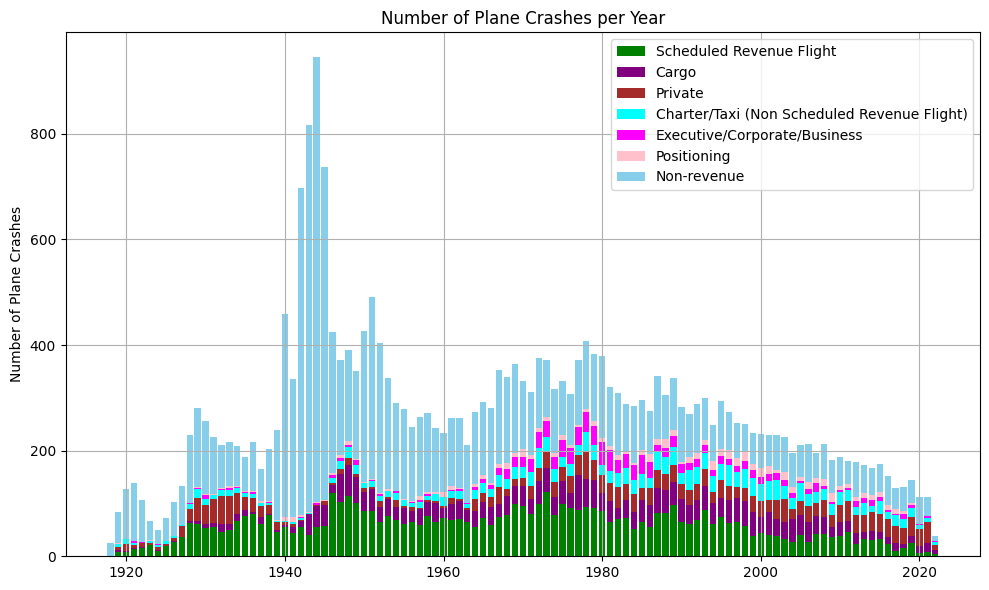

In [6]:
y_revenue = [flight_types_dict["Scheduled Revenue Flight"][year] for year in x]
y_taxi = [flight_types_dict["Charter/Taxi (Non Scheduled Revenue Flight)"][year] for year in x]
y_business = [flight_types_dict["Executive/Corporate/Business"][year] for year in x]
y_private = [flight_types_dict["Private"][year] for year in x]
y_positioning = [flight_types_dict["Positioning"][year] for year in x]
y_cargo = [flight_types_dict["Cargo"][year] for year in x]

plt.figure(figsize=(10, 6))

bars_revenue = plt.bar(x, y_revenue, color='green', label='Scheduled Revenue Flight')
bars_cargo = plt.bar(x, y_cargo, bottom=y_revenue, color='purple', label='Cargo')
bars_private = plt.bar(x, y_private, bottom=np.array(y_revenue) + np.array(y_cargo), color='brown', label='Private')
bars_taxi = plt.bar(x, y_taxi, bottom=np.array(y_private) + np.array(y_revenue) + np.array(y_cargo), color='cyan', label='Charter/Taxi (Non Scheduled Revenue Flight)')
bars_business = plt.bar(x, y_business, bottom=np.array(y_taxi) + np.array(y_private) + np.array(y_revenue) + np.array(y_cargo), color='magenta', label='Executive/Corporate/Business')
bars_positioning = plt.bar(x, y_positioning, bottom=np.array(y_taxi) + np.array(y_private) + np.array(y_revenue) + np.array(y_business) + np.array(y_cargo), color='pink', label='Positioning')

non_revenue_y = np.array(y_total) - np.array(y_taxi) - np.array(y_private) - np.array(y_revenue) - np.array(y_business) - np.array(y_positioning) - np.array(y_cargo)
non_revenue_bottom = np.array(y_taxi) + np.array(y_private) + np.array(y_revenue) + np.array(y_business) + np.array(y_positioning) + np.array(y_cargo)
bars_non_revenue = plt.bar(x, non_revenue_y, bottom=non_revenue_bottom, color='skyblue', label='Non-revenue')

plt.ylabel('Number of Plane Crashes')
plt.title('Number of Plane Crashes per Year')

plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

### 2. Ali in kako faze, v katerih se je zgodila nesreča, in vrste letov (komercialni, vojaški itd.) vplivajo na odstotek oz. število umrlih potnikov?

In [7]:
data = pd.read_csv(PlaneCrashes)

data = data[(data['Pax on board'] < 1000) & (data['Crew on board'] < 1000) & (data['Pax on board'] >= data['PAX fatalities']) & (data['Crew on board'] >= data['Crew fatalities'])]

data_pax_filtered = data[(data['Pax on board'] != "NA") & (data['Pax on board'] > 0)].copy()
data_crew_filtered = data[(data['Crew on board'] != "NA") & (data['Crew on board'] > 0)].copy()

data_pax_filtered['PAX percentage'] = data_pax_filtered.apply(lambda row: row['PAX fatalities'] / row['Pax on board'] * 100, axis=1)
data_crew_filtered['Crew percentage'] = data_crew_filtered.apply(lambda row: row['Crew fatalities'] / row['Crew on board'] * 100, axis=1)


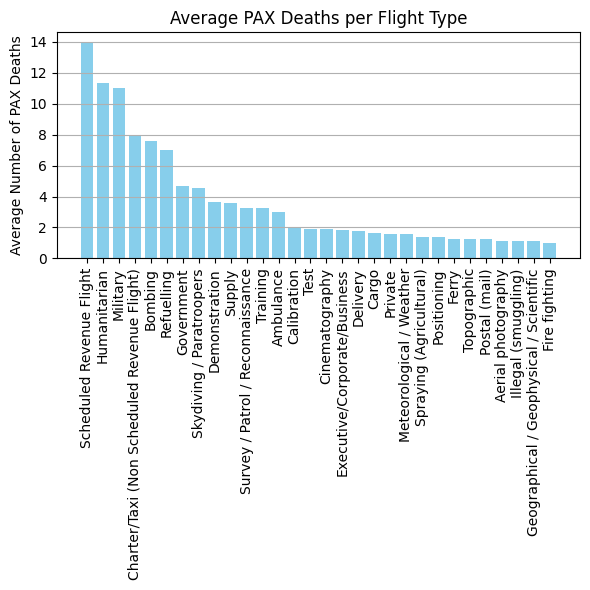

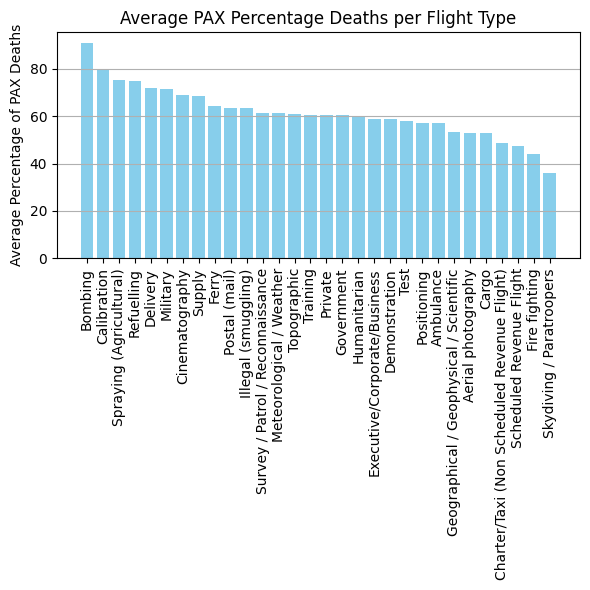

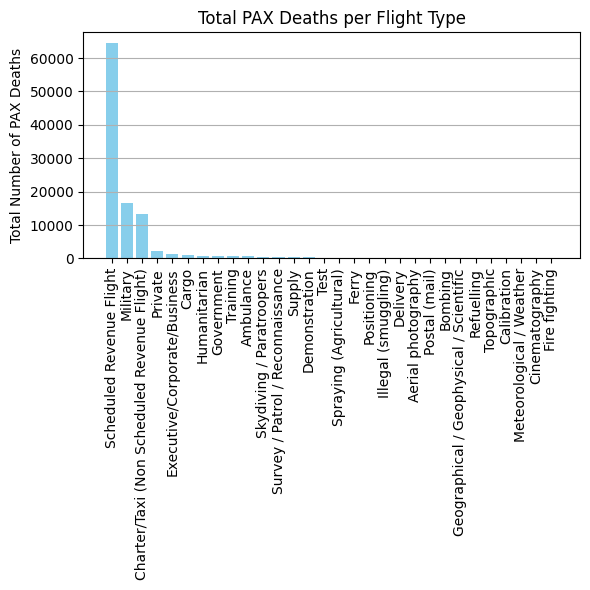

In [8]:

pax_grouped = data_pax_filtered.groupby('Flight type').agg({'PAX fatalities':'mean', 'PAX percentage':'mean'}).reset_index()
pax_grouped_type = data_pax_filtered.groupby('Flight type')['PAX fatalities'].sum().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

pax_grouped = pax_grouped.sort_values(by='PAX fatalities', ascending=False)
pax_grouped.plot(x='Flight type', y='PAX fatalities', kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Average PAX Deaths per Flight Type')
axes[0].set_ylabel('Average Number of PAX Deaths')
axes[0].grid(True, axis='y')

pax_grouped = pax_grouped.sort_values(by='PAX percentage', ascending=False)
pax_grouped.plot(x='Flight type', y='PAX percentage', kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('Average PAX Percentage Deaths per Flight Type')
axes[1].set_ylabel('Average Percentage of PAX Deaths')
axes[1].grid(True, axis='y')

pax_grouped_type = pax_grouped_type.sort_values(by='PAX fatalities', ascending=False)
pax_grouped_type.plot(x='Flight type', y='PAX fatalities', kind='bar', ax=axes[2], color='skyblue')
axes[2].set_title('Total PAX Deaths per Flight Type')
axes[2].set_ylabel('Total Number of PAX Deaths')
axes[2].grid(True, axis='y')



plt.tight_layout()
plt.show()


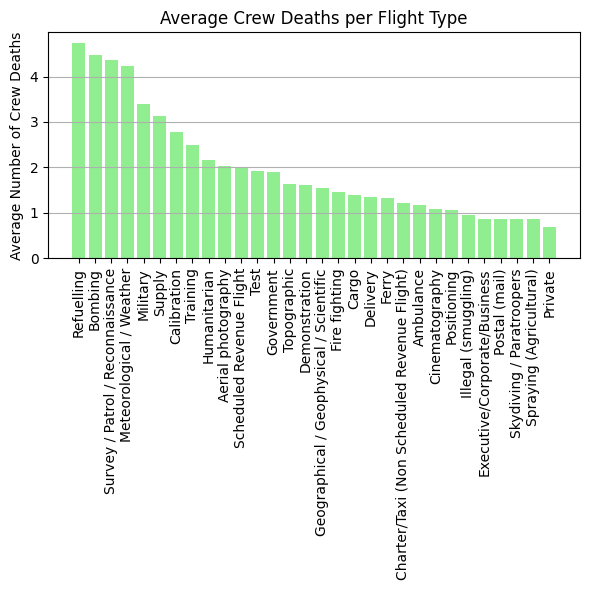

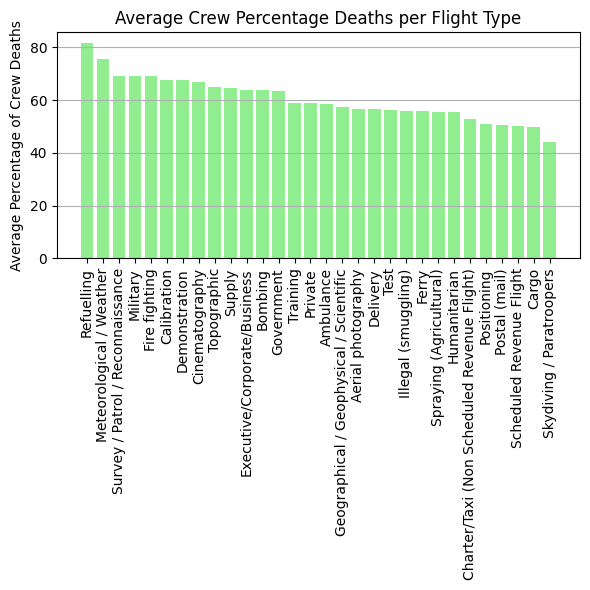

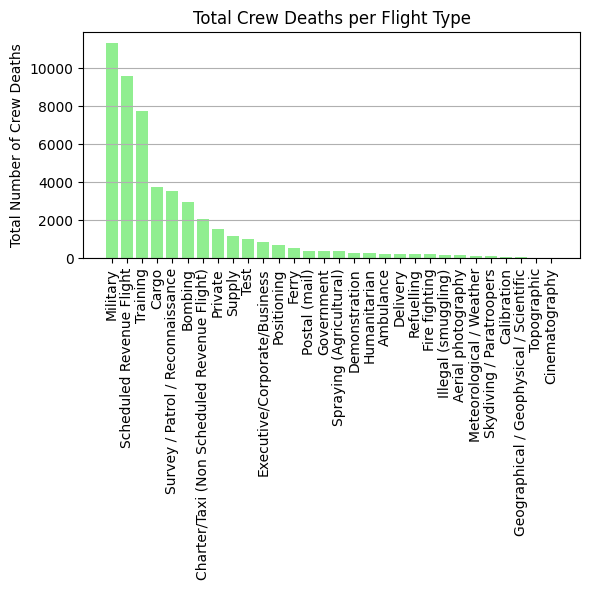

In [9]:
crew_grouped = data_crew_filtered.groupby('Flight type').agg({'Crew fatalities':'mean', 'Crew percentage':'mean'}).reset_index()
crew_grouped_type = data_crew_filtered.groupby('Flight type')['Crew fatalities'].sum().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

crew_grouped = crew_grouped.sort_values(by='Crew fatalities', ascending=False)
crew_grouped.plot(x='Flight type', y='Crew fatalities', kind='bar', ax=axes[0], color='lightgreen')
axes[0].set_title('Average Crew Deaths per Flight Type')
axes[0].set_ylabel('Average Number of Crew Deaths')
axes[0].grid(True, axis='y')

crew_grouped = crew_grouped.sort_values(by='Crew percentage', ascending=False)
crew_grouped.plot(x='Flight type', y='Crew percentage', kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Average Crew Percentage Deaths per Flight Type')
axes[1].set_ylabel('Average Percentage of Crew Deaths')
axes[1].grid(True, axis='y')

crew_grouped_type = crew_grouped_type.sort_values(by='Crew fatalities', ascending=False)
crew_grouped_type.plot(x='Flight type', y='Crew fatalities', kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('Total Crew Deaths per Flight Type')
axes[2].set_ylabel('Total Number of Crew Deaths')
axes[2].grid(True, axis='y')

plt.tight_layout()
plt.show()

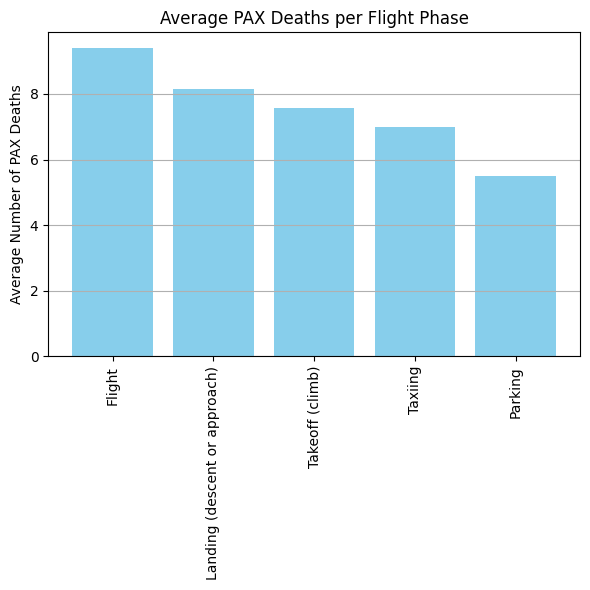

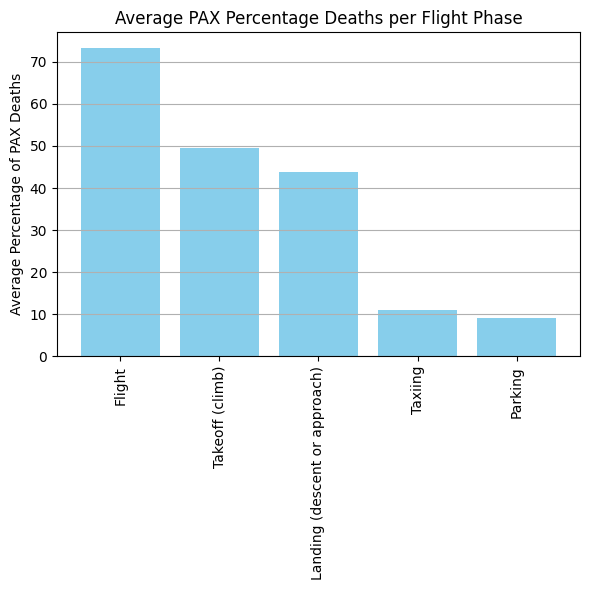

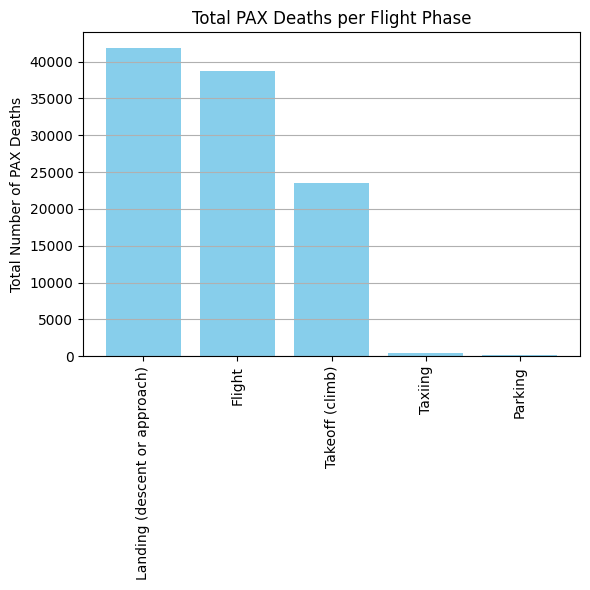

In [10]:
pax_grouped_phase = data_pax_filtered.groupby('Flight phase').agg({'PAX fatalities':'mean', 'PAX percentage':'mean'}).reset_index()
pax_grouped_phase_sum = data_pax_filtered.groupby('Flight phase')['PAX fatalities'].sum().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

pax_grouped_phase = pax_grouped_phase.sort_values(by='PAX fatalities', ascending=False)
pax_grouped_phase.plot(x='Flight phase', y='PAX fatalities', kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Average PAX Deaths per Flight Phase')
axes[0].set_ylabel('Average Number of PAX Deaths')
axes[0].grid(True, axis='y')

pax_grouped_phase = pax_grouped_phase.sort_values(by='PAX percentage', ascending=False)
pax_grouped_phase.plot(x='Flight phase', y='PAX percentage', kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('Average PAX Percentage Deaths per Flight Phase')
axes[1].set_ylabel('Average Percentage of PAX Deaths')
axes[1].grid(True, axis='y')

pax_grouped_phase_sum = pax_grouped_phase_sum.sort_values(by='PAX fatalities', ascending=False)
pax_grouped_phase_sum.plot(x='Flight phase', y='PAX fatalities', kind='bar', ax=axes[2], color='skyblue')
axes[2].set_title('Total PAX Deaths per Flight Phase')
axes[2].set_ylabel('Total Number of PAX Deaths')
axes[2].grid(True, axis='y')

plt.tight_layout()
plt.show()

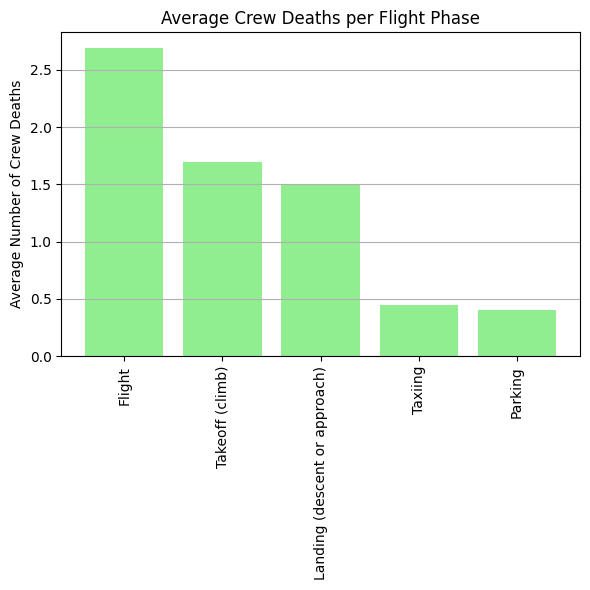

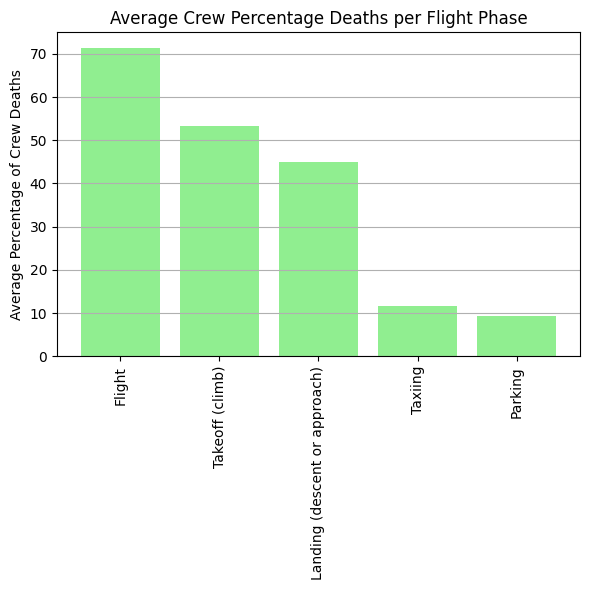

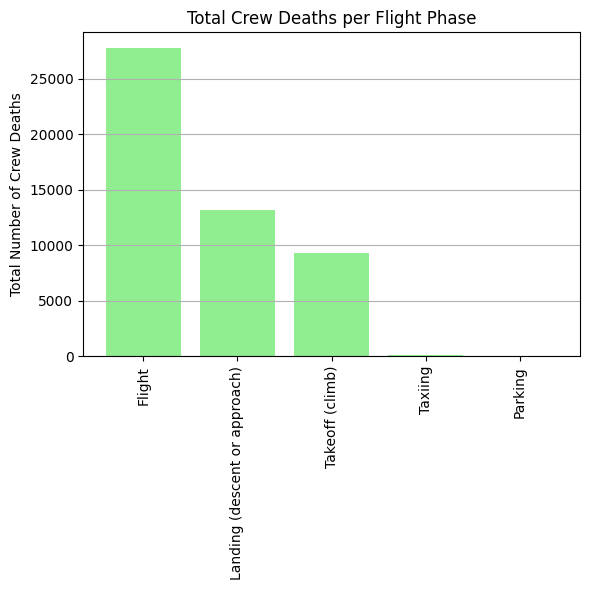

In [11]:
crew_grouped_phase = data_crew_filtered.groupby('Flight phase').agg({'Crew fatalities':'mean', 'Crew percentage':'mean'}).reset_index()
crew_grouped_phase_sum = data_crew_filtered.groupby('Flight phase')['Crew fatalities'].sum().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(15, 10))

crew_grouped_phase = crew_grouped_phase.sort_values(by='Crew fatalities', ascending=False)
crew_grouped_phase.plot(x='Flight phase', y='Crew fatalities', kind='bar', ax=axes[0], color='lightgreen')
axes[0].set_title('Average Crew Deaths per Flight Phase')
axes[0].set_ylabel('Average Number of Crew Deaths')
axes[0].grid(True, axis='y')

crew_grouped_phase = crew_grouped_phase.sort_values(by='Crew percentage', ascending=False)
crew_grouped_phase.plot(x='Flight phase', y='Crew percentage', kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Average Crew Percentage Deaths per Flight Phase')
axes[1].set_ylabel('Average Percentage of Crew Deaths')
axes[1].grid(True, axis='y')

crew_grouped_phase_sum = crew_grouped_phase_sum.sort_values(by='Crew fatalities', ascending=False)
crew_grouped_phase_sum.plot(x='Flight phase', y='Crew fatalities', kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('Total Crew Deaths per Flight Phase')
axes[2].set_ylabel('Total Number of Crew Deaths')
axes[2].grid(True, axis='y')

plt.tight_layout()
plt.show()

### 3. Ali in kako kraj nesreče in število potnikov vplivata na število smrtnih žrtev med ljudmi, ki niso bili potniki?

In [12]:
df = pd.read_csv("Podatki/PlaneCrashes.csv")
df.dropna(subset=['Crew on board'], inplace=True)
df.dropna(subset=['Crew fatalities'], inplace=True)
df.dropna(subset=['Pax on board'], inplace=True)
df.dropna(subset=['PAX fatalities'], inplace=True)
df.dropna(subset=['Total fatalities'], inplace=True)
df.dropna(subset=['Crash site'], inplace=True)


temp_3 = []
temp_4 = []
temp_6 = []
for i in range (df['Crash site'].unique().size):
    temp_3.append(0)
    temp_4.append(0)
    temp_6.append(0)
    

data2 = {'Site': df['Crash site'].unique(),
         'Number of crashes': temp_3,
         'Total amount of non plane fatalities': temp_4,
         'Total fat': temp_6
       }
 
df3 = pd.DataFrame(data2)

temp_1 = []
temp_2 = []

for row in df.index:
    AOF = df['Crew on board'][row] + df["Pax on board"][row]
    FPD = df['Crew fatalities'][row] + df['PAX fatalities'][row]
    temp_1.append(AOF)
    temp_2.append(FPD)

data = {'Location': df['Crash site'],
        'People on plane': temp_1,
        'Crew on board': df['Crew on board'],
        'Pax on board': df['Pax on board'],
        'Plane fatalities': temp_2,
        'Crew fatalities': df['Crew fatalities'],
        'PAX fatalitie': df['PAX fatalities'],
        'Total fatalities': df['Total fatalities']
       }
 
df2 = pd.DataFrame(data)


for row in df2.index:
    for i in df3.index:
        if df2['Location'][row] == df3['Site'][i]:
            df3.loc[i, 'Number of crashes'] += 1
            df3.loc[i, 'Total amount of non plane fatalities'] += df2['Total fatalities'][row] - df2['Plane fatalities'][row]
            df3.loc[i, 'Total fat'] += df2['Total fatalities'][row]




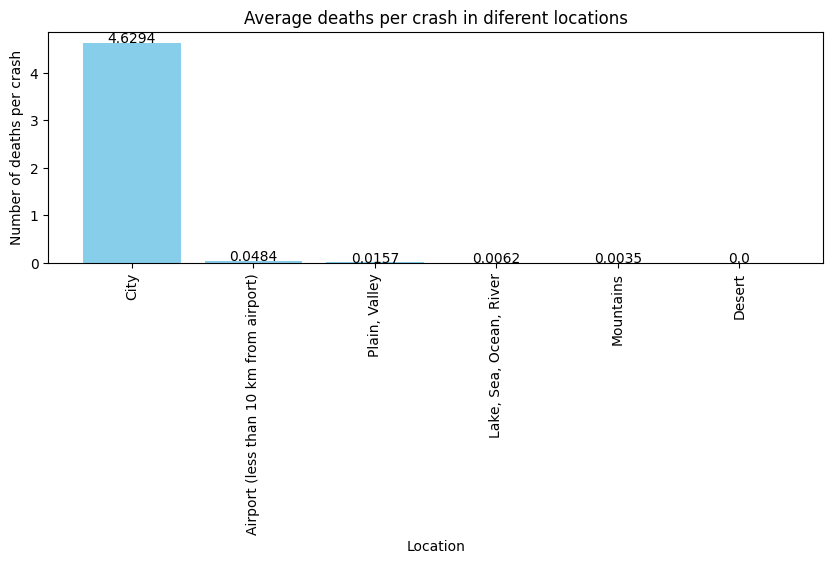

In [13]:
temp_5 = []
for i in df3.index:
    if df3['Total amount of non plane fatalities'][i] == 0:
        temp_5.append(0)
    else:
        temp_5.append(round((df3['Total amount of non plane fatalities'][i] / df3['Number of crashes'][i]),4))

df3['Average'] = temp_5

df3 = df3.sort_values(by=['Average'], ascending=False)

plt.figure(figsize=(10, 3))
bars = plt.bar(df3['Site'],  df3['Average'], color='skyblue')
plt.xlabel('Location')
plt.ylabel('Number of deaths per crash')
plt.title('Average deaths per crash in diferent locations')
plt.xticks(rotation=90)
plt.grid(False)

for bar, tpo in zip(bars, df3["Average"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{tpo}', ha='center')

plt.show()

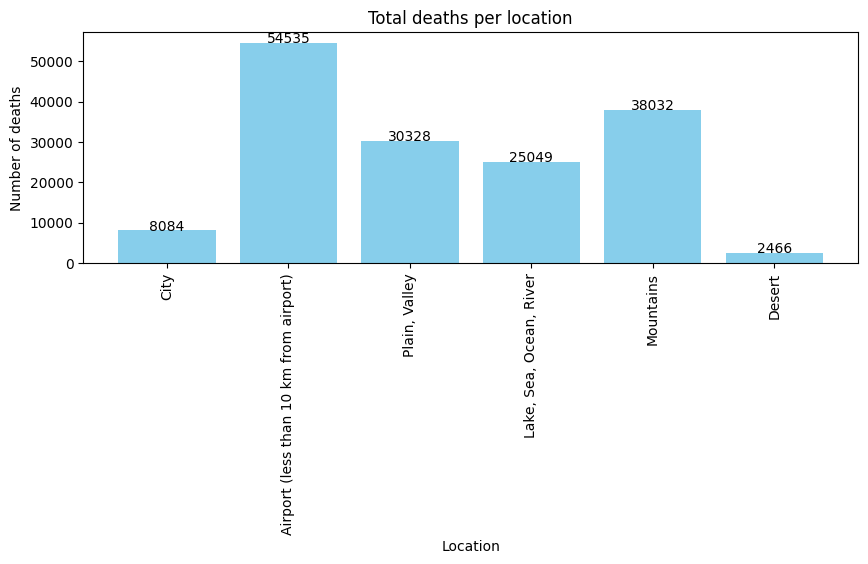

In [14]:
plt.figure(figsize=(10, 3))
bars = plt.bar(df3['Site'],  df3['Total fat'], color='skyblue')
plt.xlabel('Location')
plt.ylabel('Number of deaths')
plt.title('Total deaths per location')
plt.xticks(rotation=90)
plt.grid(False)

for bar, tpo in zip(bars, df3["Total fat"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{tpo}', ha='center')

plt.show()

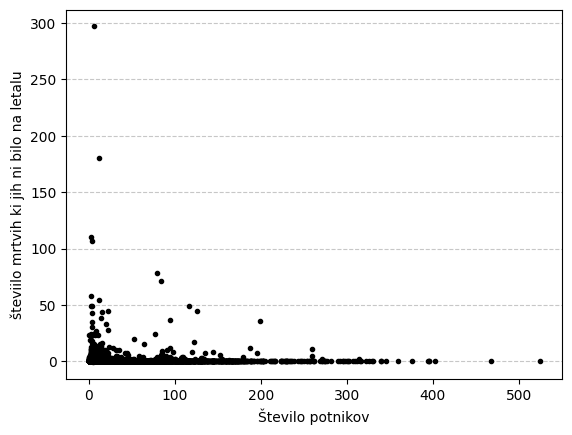

Korelacija: 


0.028439400311543794

In [15]:
x2 = []
y2 = []

df2['Total fatalities'][row] - df2['Plane fatalities'][row]



for row in df2.index:   
    if df2['People on plane'][row] < 1000:
        y2.append(df2['Total fatalities'][row] - df2['Plane fatalities'][row])
        x2.append(df2['People on plane'][row])

x2 = np.array(x2)
y2 = np.array(y2)

plt.figure()


plt.plot(x2, y2, 'k.')
plt.xlabel('Število potnikov')
plt.ylabel('števiilo mrtvih ki jih ni bilo na letalu')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("Korelacija: ")
np.mean(((x2 - np.mean(x2))*(y2-np.mean(y2)))/(np.std(x2)*np.std(y2)))

### 4. Katera letala so najbolj nevarna?

### 5. Ali in kateri modeli letal ter vrste letov so bolj nagnjeni k določenim vrstam nesreč (tehnična okvara, človeška napaka itd.)?

### 6. Kako ura vpliva na nesreče, ali se bolj pogosto dogajajo ponoči?

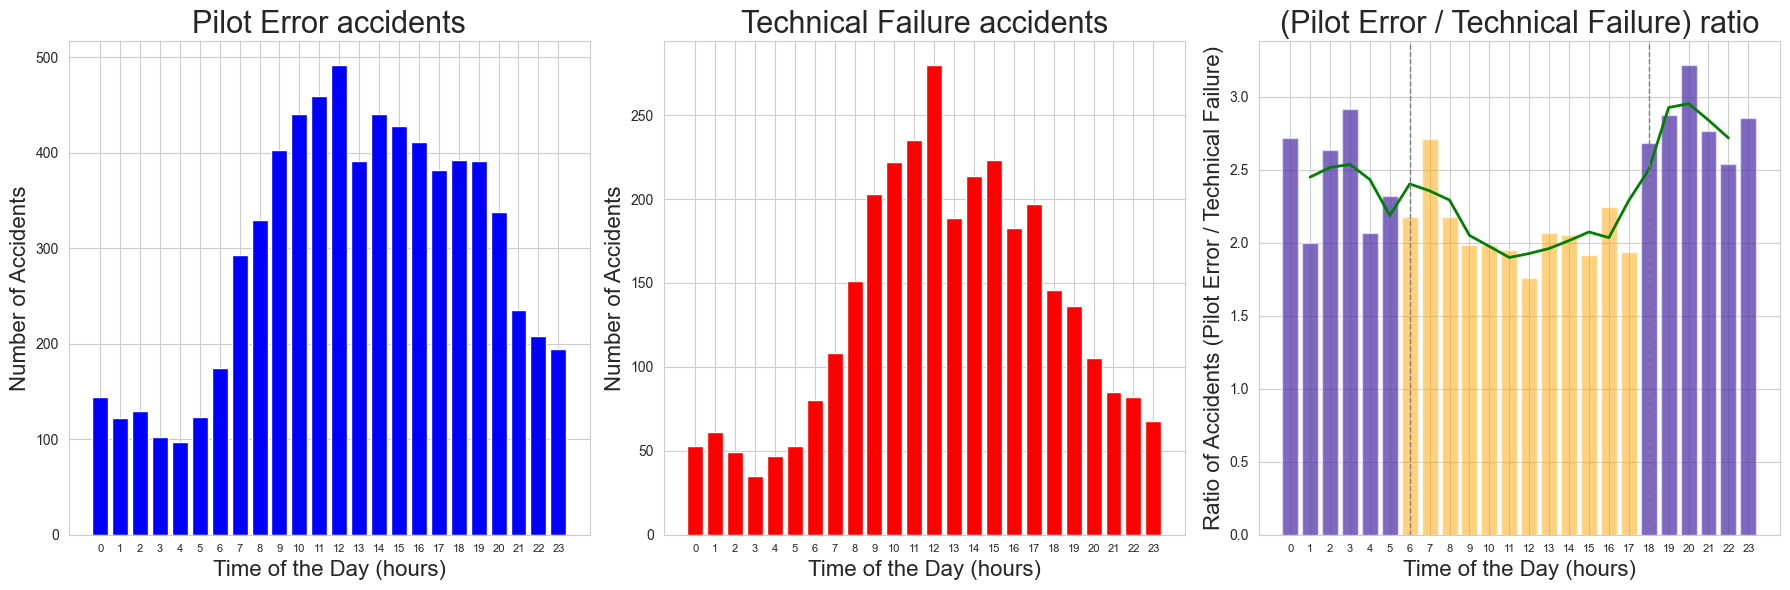

In [18]:
plt.rc('xtick', labelsize=8)

def read_data(cause):
    times = []
    with open(PlaneCrashes, 'rt', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['Crash cause'] == cause and row['Time']:
                time_components = row['Time'].split(" ")
                try:
                    if 'H' in time_components[0]:
                        hour = int(time_components[0][:-1])
                    else:
                        hour = 0
                    times.append(hour)
                except ValueError:
                    print("Invalid time format, skipping:", row['Time'])
    return times

def plot_data(times, title, color='b'):
    unique_hours, counts = np.unique(times, return_counts=True)
    
    plt.bar(unique_hours, counts, color=color)
    plt.xlabel('Time of the Day (hours)')
    plt.ylabel('Number of Accidents')
    plt.title(title)
    plt.xticks(np.arange(0, 24, step=1))
    plt.grid(True)

def plot_ratio(pilot_error_times, technical_failure_times, window_size=3):
    pilot_error_counts = np.bincount(pilot_error_times).astype(float)
    technical_failure_counts = np.bincount(technical_failure_times).astype(float)
    
    ratio = np.divide(pilot_error_counts, technical_failure_counts, out=np.zeros_like(pilot_error_counts), where=technical_failure_counts!=0)
    smoothed_ratio = np.convolve(ratio, np.ones(window_size)/window_size, mode='valid')

    day_color = 'orange'
    night_color = 'blue'

    plt.bar(np.arange(24), ratio, color=day_color, alpha=0.5)
    
    night_hours = np.where((np.arange(24) < 6) | (np.arange(24) >= 18))[0]
    plt.bar(night_hours, ratio[night_hours], color=night_color, alpha=0.5)
    
    plt.plot(np.arange(window_size // 2, 24 - window_size // 2), smoothed_ratio, color='green', linestyle='-', linewidth=2)
    
    plt.xlabel('Time of the Day (hours)')
    plt.ylabel('Ratio of Accidents (Pilot Error / Technical Failure)')
    plt.title('(Pilot Error / Technical Failure) ratio')
    plt.xticks(np.arange(0, 24, step=1))
    plt.grid(True)
    
    plt.axvline(x=6, color='gray', linestyle='--', linewidth=1)
    plt.axvline(x=18, color='gray', linestyle='--', linewidth=1)

pilot_error_times = read_data("Human factor")
technical_failure_times = read_data("Technical failure")

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plot_data(pilot_error_times, 'Pilot Error accidents', 'b')
plt.title('Pilot Error accidents', fontsize=22)
plt.xlabel('Time of the Day (hours)', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)

plt.subplot(1, 3, 2)
plot_data(technical_failure_times, 'Technical Failure accidents', 'r')
plt.title('Technical Failure accidents', fontsize=22)
plt.xlabel('Time of the Day (hours)', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)

plt.subplot(1, 3, 3)
plot_ratio(pilot_error_times, technical_failure_times)
plt.title('(Pilot Error / Technical Failure) ratio', fontsize=22)
plt.xlabel('Time of the Day (hours)', fontsize=16)
plt.ylabel('Ratio of Accidents (Pilot Error / Technical Failure)', fontsize=16)

plt.tight_layout()

Tekom dneva, ko je na nebu svetloba, je manj nesreč, kot tekom noči, ko je 1/4 večja verjetnost da bo za nescrečo kriv pilot kot pa tehnična napaka.

### 7. Ali starost posameznega letala vpliva na možnost nesreče?

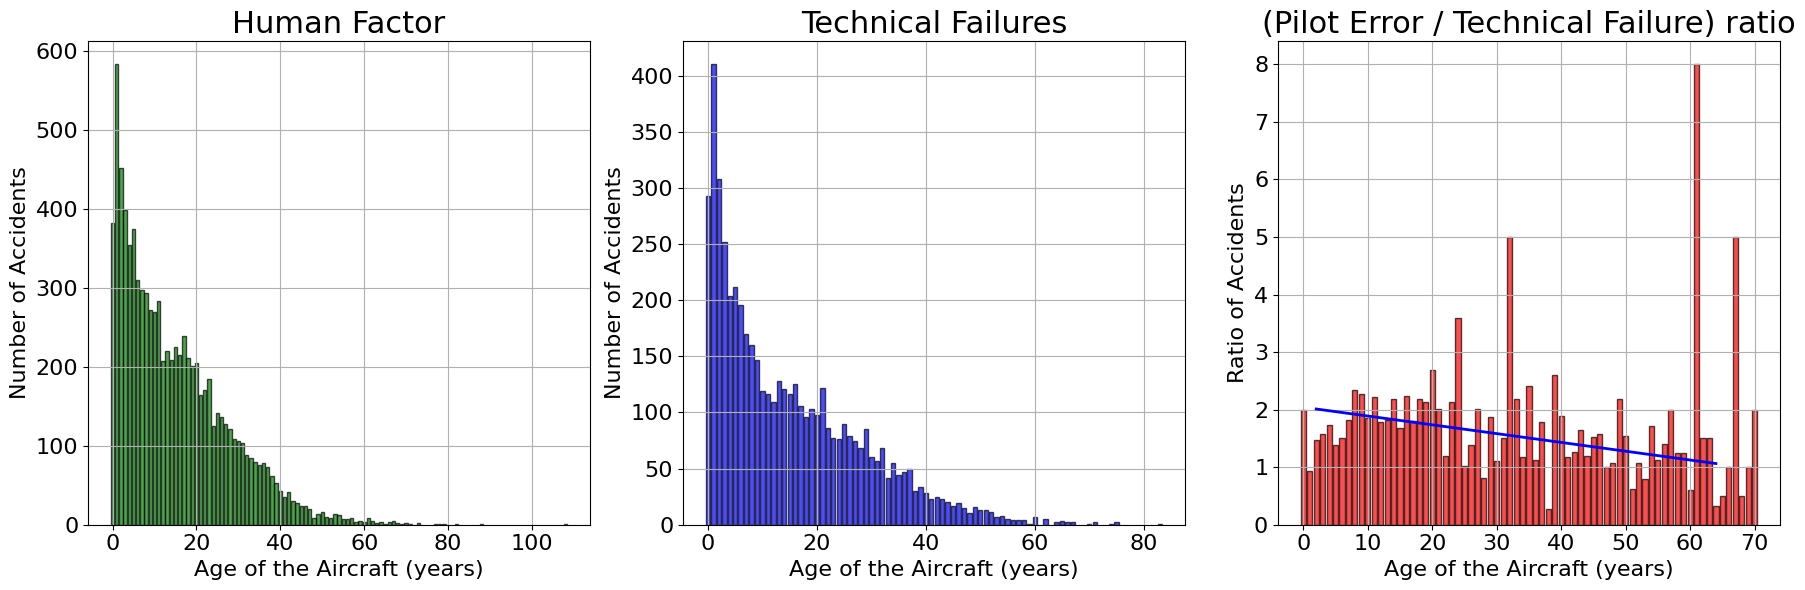

In [19]:
def read_csv_data(file_path, crash_cause):
    ages = {}
    with open(file_path, 'rt', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['Crash cause'] == crash_cause and row['YOM']:
                try:
                    year_of_manufacture = int(row['YOM'])
                    crash_date = datetime.strptime(row['Date'], "%Y-%m-%d %H:%M:%S").year
                    age = crash_date - year_of_manufacture
                    if age > -1 and age < 116:
                        if age in ages:
                            ages[age] += 1
                        else:
                            ages[age] = 1
                except ValueError:
                    print("Invalid year of manufacture, skipping:", row['YOM'])
    return ages

def plot_histogram(data_dict, title, color):
    keys = list(data_dict.keys())
    values = list(data_dict.values())
    
    plt.bar(keys, values, color=color, edgecolor='black', alpha=0.7)
    plt.xlabel('Age of the Aircraft (years)')
    plt.ylabel('Number of Accidents')
    plt.title(title)
    plt.grid(True)

def plot_ratio(human_data_dict, technical_data_dict):
    human_data = list(human_data_dict.values())
    technical_data = list(technical_data_dict.values())

    min_length = min(len(human_data), len(technical_data))
    human_data = human_data[:min_length]
    technical_data = technical_data[:min_length]

    human_data = np.array(human_data).astype(float)
    technical_data = np.array(technical_data).astype(float)
    
    with np.errstate(divide='ignore', invalid='ignore'):
        ratio_data = np.where(technical_data != 0, human_data / technical_data, np.nan)

    plot_histogram({i: ratio_data[i] for i in range(len(ratio_data))}, 'Ratio of Accidents (Pilot Error / Technical Failure)', 'r')

    ratio_data_filtered = ratio_data[ratio_data <= 3]

    window_size = 5
    smoothed_ratio = np.convolve(ratio_data_filtered, np.ones(window_size) / window_size, mode='valid')

    x = np.arange(window_size // 2, len(smoothed_ratio) + window_size // 2)
    slope, intercept = np.polyfit(x, smoothed_ratio, 1)

    plt.plot(x, slope * x + intercept, color='blue', linestyle='-', linewidth=2)

    plt.xlabel('Age of the Aircraft (years)')
    plt.ylabel('Ratio of Accidents (Pilot Error / Technical Failure)')
    plt.title('(Pilot Error / Technical Failure) ratio with Linear Fit')
    plt.grid(True)

plt.figure(figsize=(18, 6))

technical_data = read_csv_data(PlaneCrashes, "Technical failure")
human_data = read_csv_data(PlaneCrashes, "Human factor")

plt.subplot(1, 3, 2)
plot_histogram(technical_data, 'Technical Failures', 'b')
plt.title('Technical Failures', fontsize=22)
plt.xlabel('Age of the Aircraft (years)', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 3, 1)
plot_histogram(human_data, 'Human Factor', 'g')
plt.title('Human Factor', fontsize=22)
plt.xlabel('Age of the Aircraft (years)', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1, 3, 3)
plot_ratio(human_data, technical_data)
plt.title('(Pilot Error / Technical Failure) ratio', fontsize=22)
plt.xlabel('Age of the Aircraft (years)', fontsize=16)
plt.ylabel('Ratio of Accidents', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()

Starejše je letalo, manjša je možnost da je povzročitelj nesreče pilot. Ko so letala stara že čez 60 let se vzrok nesreče zaradi tehnične napake za še enkrat poveča.

### 8. Ali so določeni operatorji ali države bolj nagnjeni k nesrečam, in če da, zakaj?

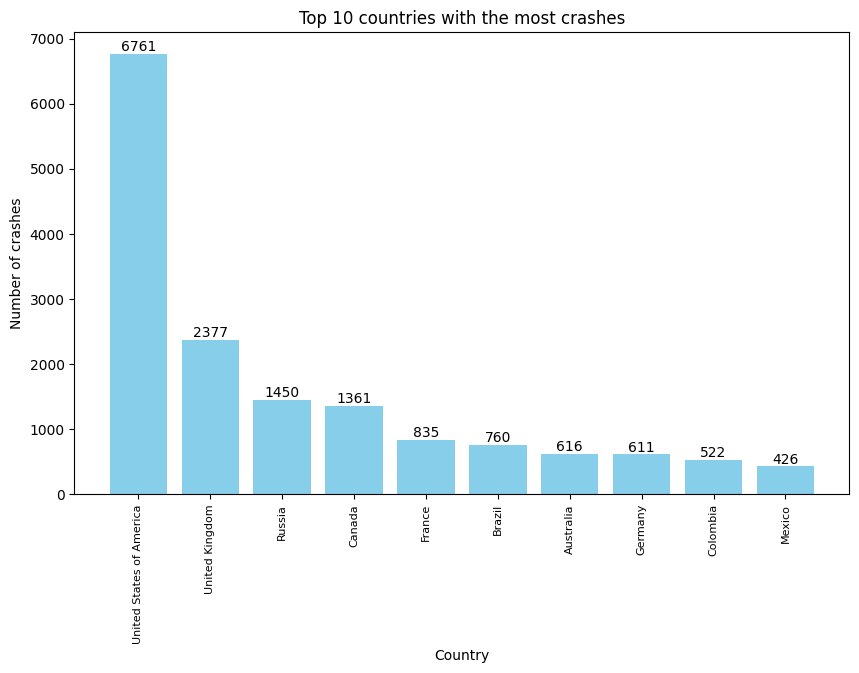

In [20]:
list_4 = df['Country'].value_counts().reset_index(name='Counts')

for x in list_4.index:
  if list_4.loc[x, 'Country'] == "World":
    list_4.loc[x, 'Country'] = np.nan

list_4.dropna(subset=['Country'], inplace=True)

Top_10_cunts = list_4.head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(Top_10_cunts['Country'],  Top_10_cunts["Counts"], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of crashes')
plt.title('Top 10 countries with the most crashes')
plt.xticks(rotation=90)
plt.grid(False)

for bar, tpo in zip(bars, Top_10_cunts["Counts"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{tpo}', ha='center', va='bottom')

plt.show()

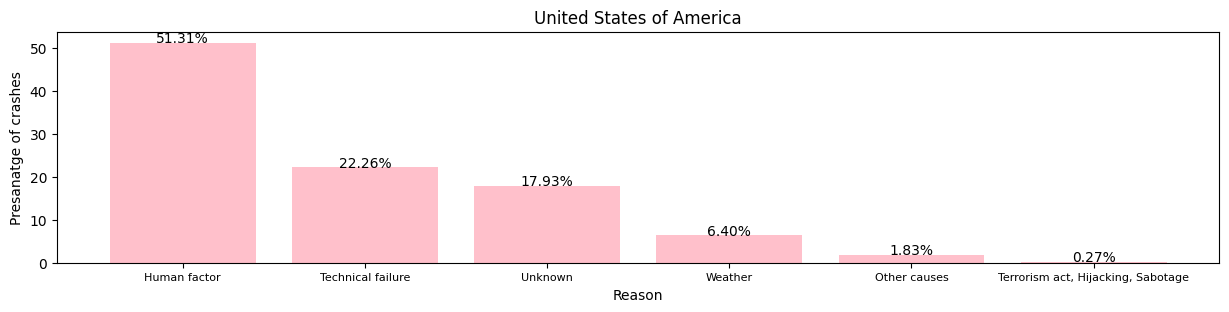

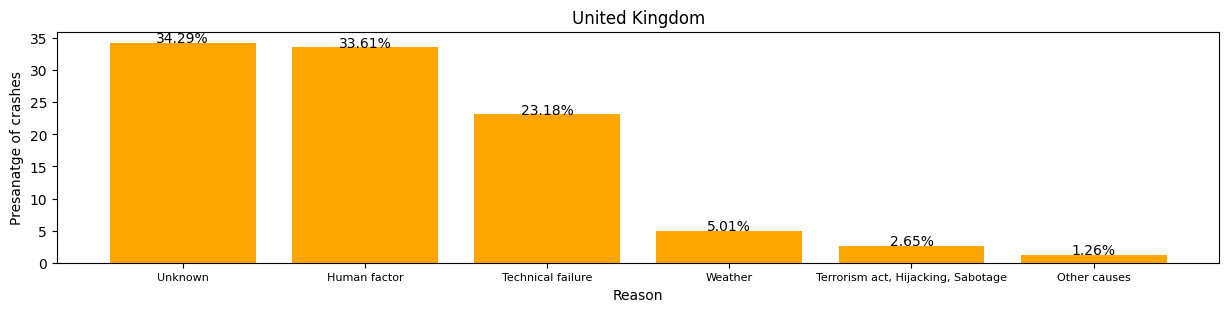

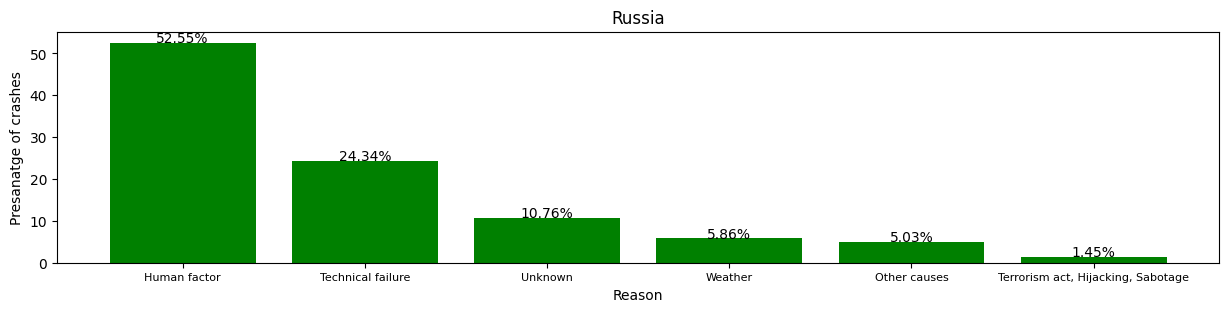

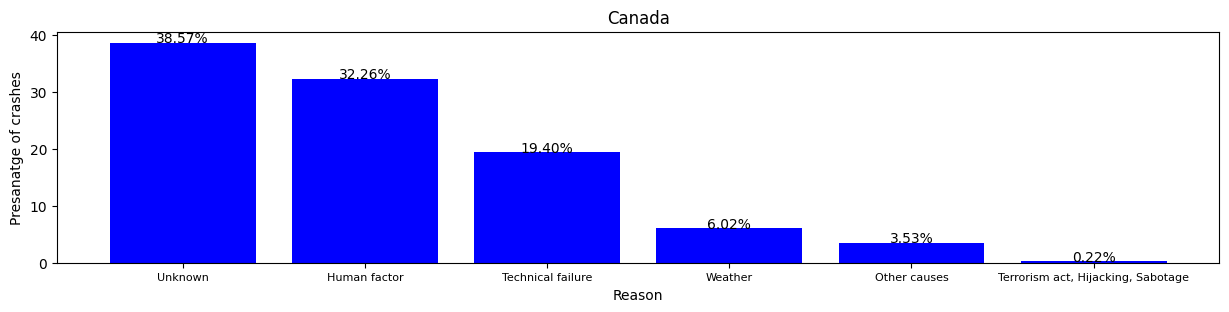

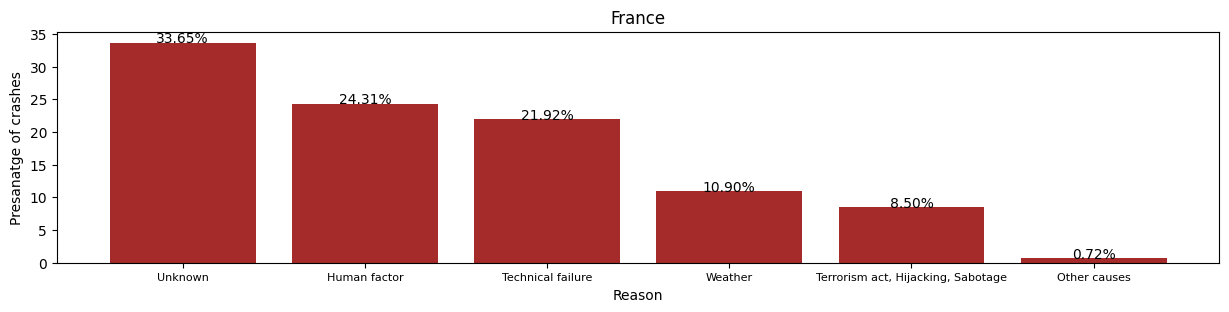

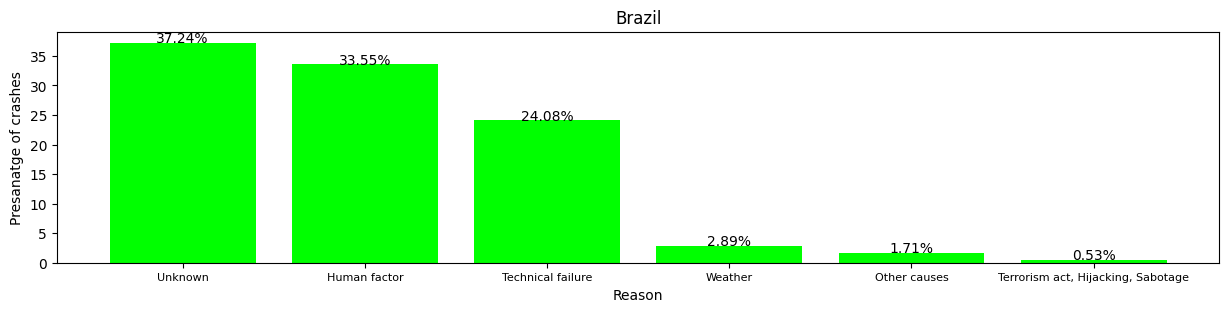

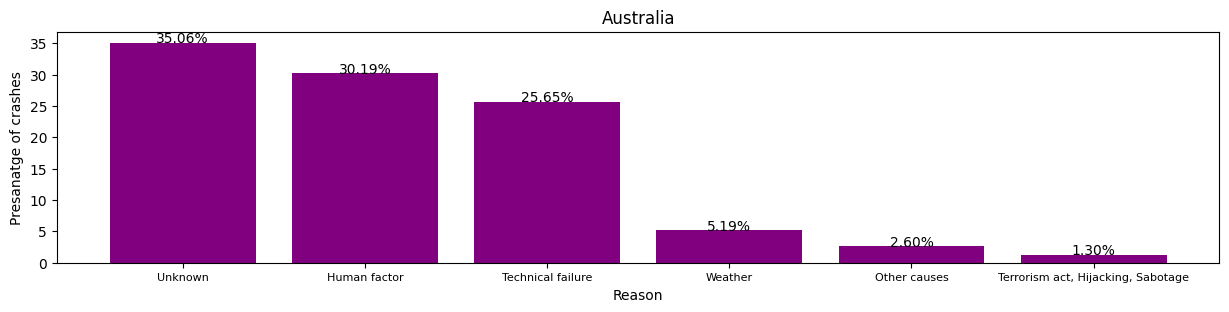

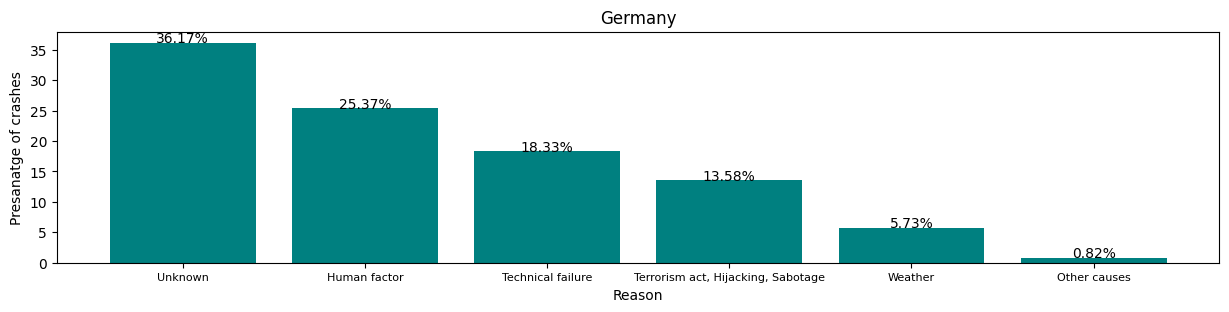

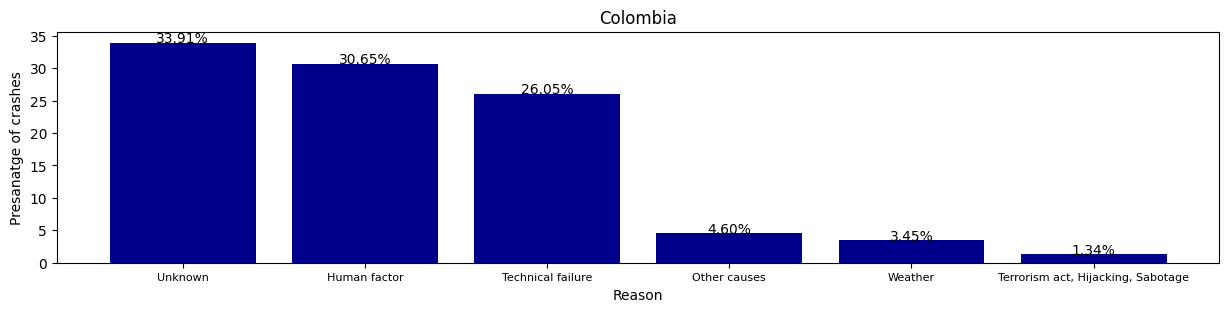

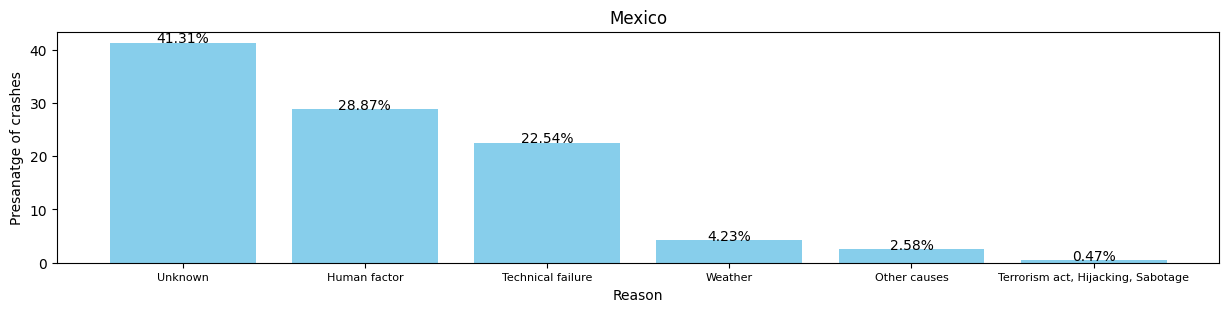

In [21]:
colors = ['pink', 'orange', 'green', 'blue', 'brown', 'lime', 'purple', 'teal', 'darkblue', 'skyblue']

ColorTemp = 0

for i in Top_10_cunts.index:
    plt.figure(figsize=(15, 3))
    temp = df.loc[df['Country'] == Top_10_cunts['Country'][i], 'Crash cause'].value_counts().reset_index(name='Counts')


    bars = plt.bar(temp['Crash cause'],  (temp["Counts"] / temp['Counts'].sum() * 100), color=colors[ColorTemp])
    
    for bar, tpo in zip(bars, (temp["Counts"] / temp['Counts'].sum() * 100)):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{tpo:.2f}%', ha='center')

    plt.xlabel('Reason')
    plt.ylabel('Presanatge of crashes')
    plt.title(Top_10_cunts['Country'][i])
    ColorTemp += 1
        

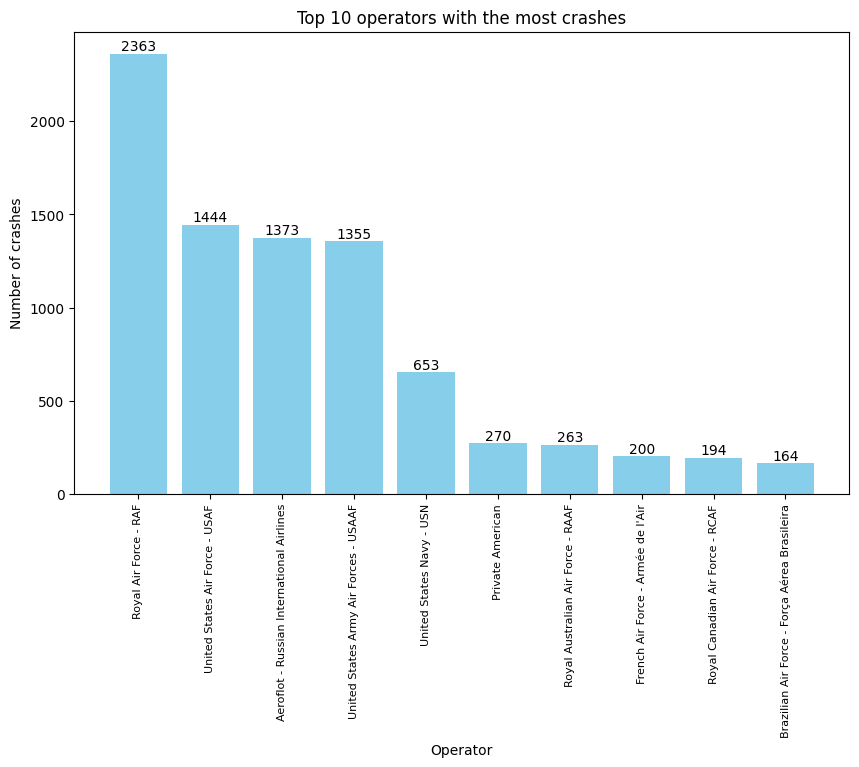

In [22]:
df = pd.read_csv("Podatki/PlaneCrashes.csv")

list_3 = df['Operator'].value_counts().reset_index(name='Counts')

for x in list_3.index:
  if list_3.loc[x, "Counts"] < 10:
    list_3.loc[x, "Counts"] = np.nan

list_3.dropna(subset=['Counts'], inplace=True)

Top_10_operator = list_3.head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(Top_10_operator['Operator'],  Top_10_operator["Counts"], color='skyblue')
plt.xlabel('Operator')
plt.ylabel('Number of crashes')
plt.title('Top 10 operators with the most crashes')
plt.xticks(rotation=90)

for bar, tpo in zip(bars, Top_10_operator["Counts"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{tpo:.0f}', ha='center', va='bottom')
    
plt.show()


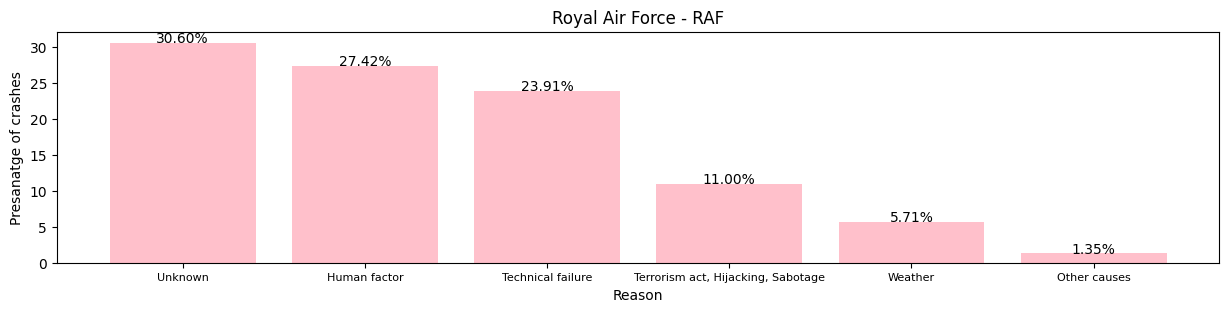

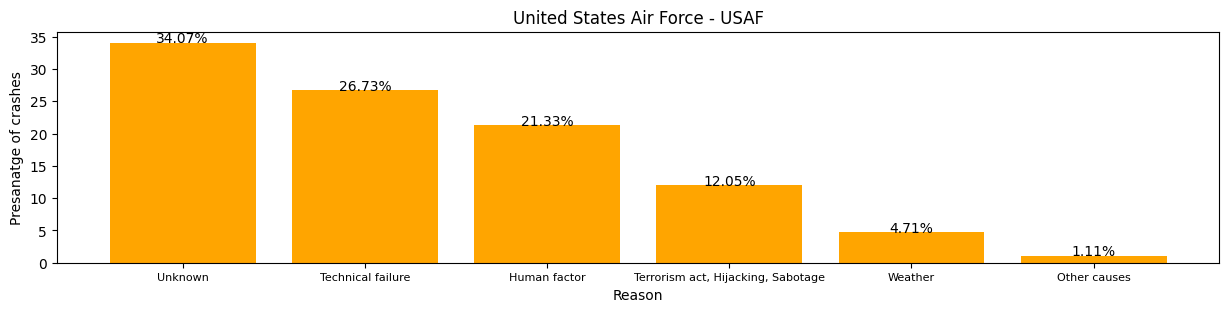

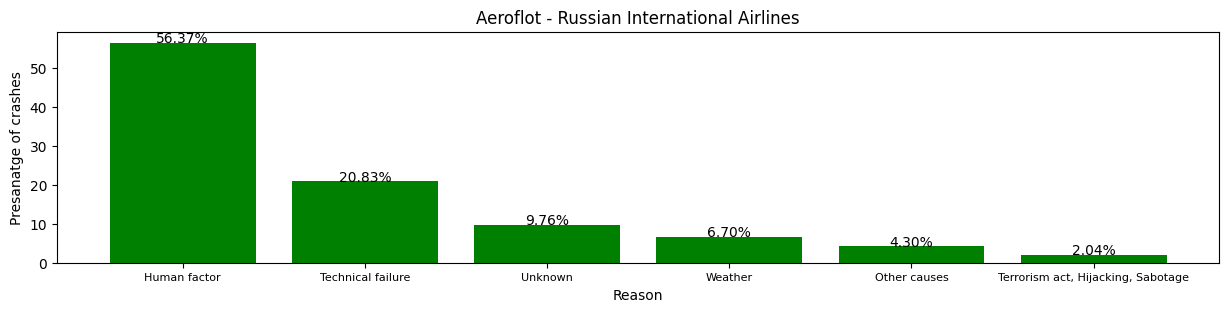

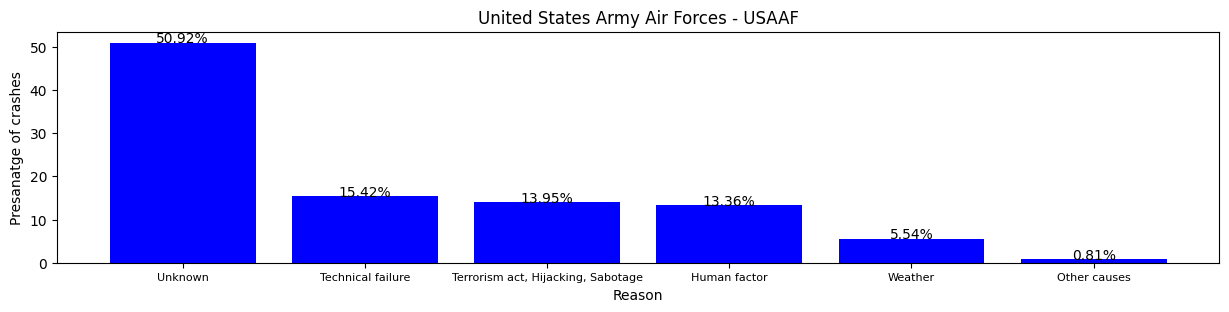

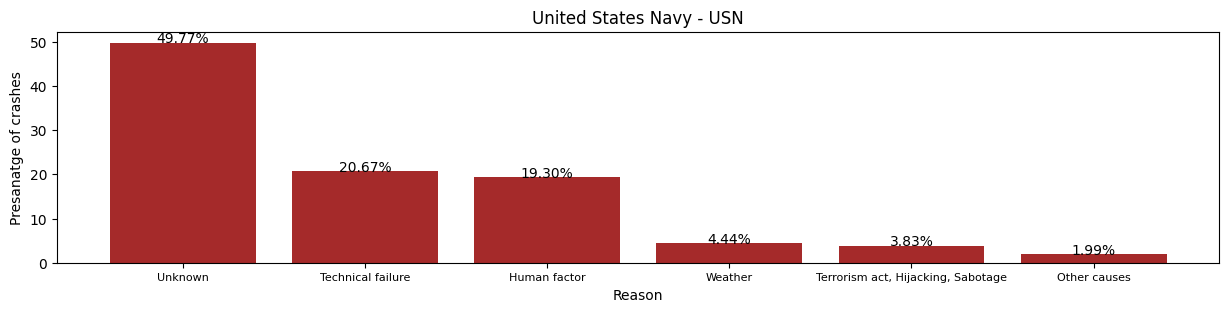

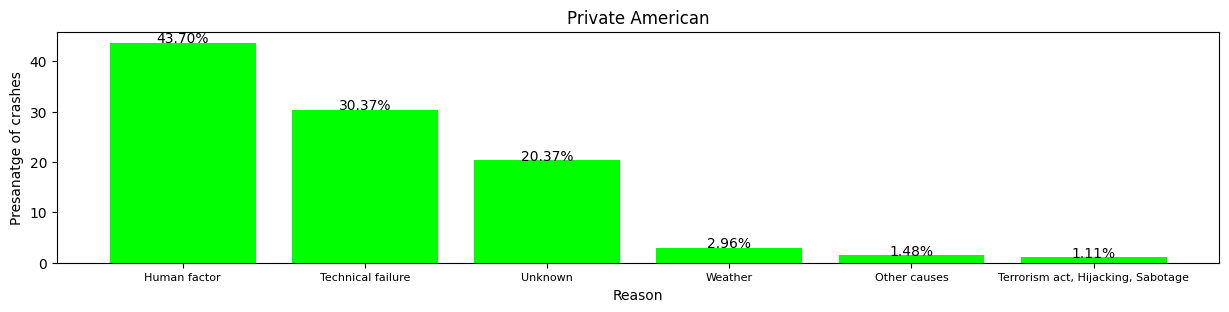

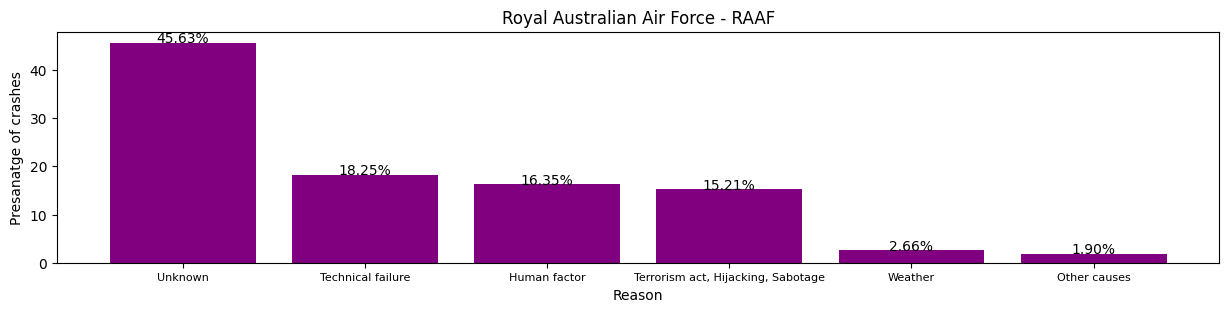

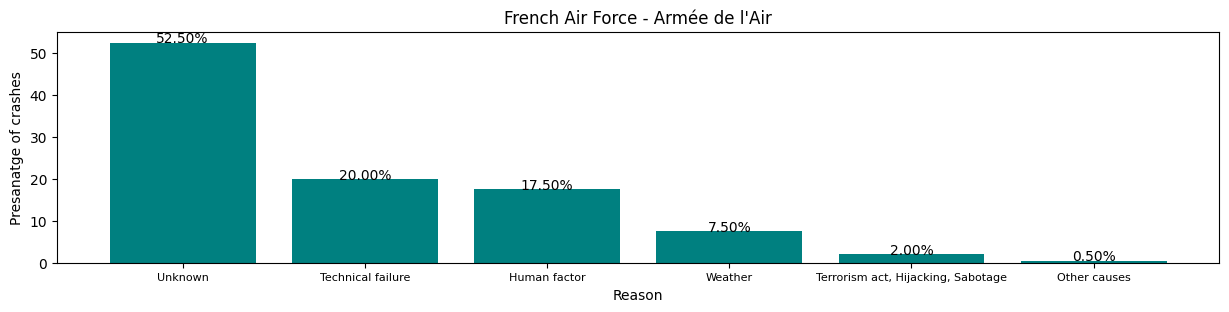

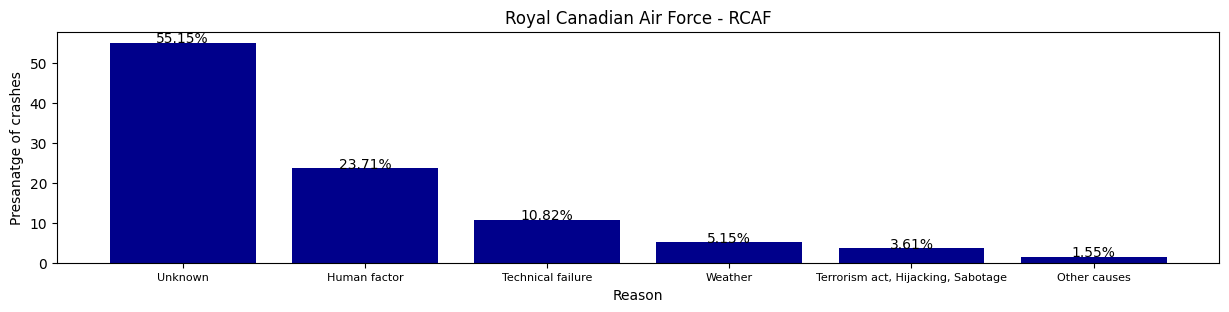

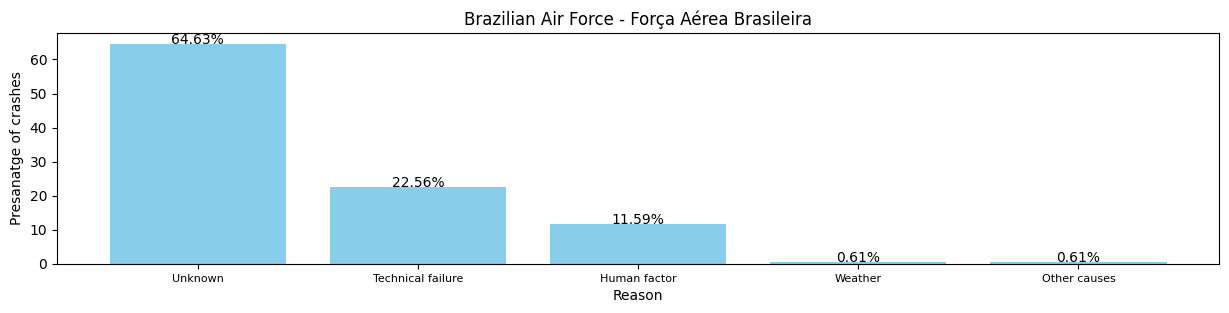

In [23]:
ColorTemp = 0
for i in Top_10_operator.index:
    plt.figure(figsize=(15, 3))
    temp = df.loc[df['Operator'] == Top_10_operator['Operator'][i], 'Crash cause'].value_counts().reset_index(name='Counts')

    bars = plt.bar(temp['Crash cause'],  (temp["Counts"] / temp['Counts'].sum() * 100), color=colors[ColorTemp])
    
    for bar, tpo in zip(bars, (temp["Counts"] / temp['Counts'].sum() * 100)):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{tpo:.2f}%', ha='center')

    plt.xlabel('Reason')
    plt.ylabel('Presanatge of crashes')
    plt.title(Top_10_operator['Operator'][i])
    ColorTemp += 1

### 9. Ali imajo določeni kraji nesreče (ocean, letališče itd.) večjo možnost preživetja?

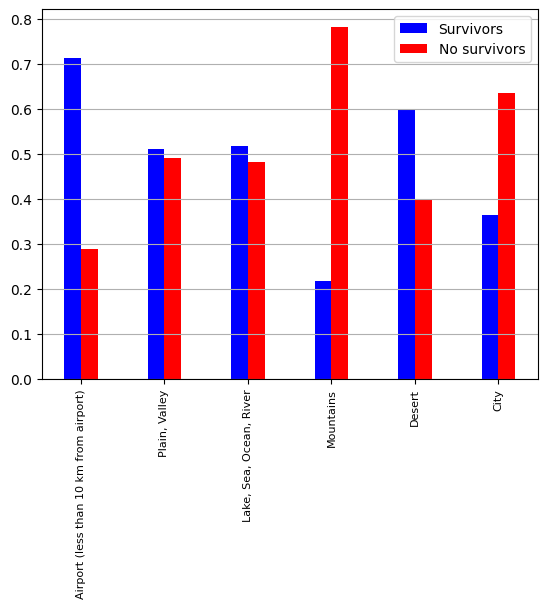

In [24]:
#survivors v PlaneCrashes.csv po lokaciji

reader = csv.DictReader(open(PlaneCrashes, 'rt', encoding='utf-8'))
survivors = {}
for row in reader:
    site = row['Crash site']
    survival = row['Survivors']
    if site.strip():
        if(survival == ''):
            survivors['NA'] += 1
            continue
        if(site not in survivors):
            survivors[site] = [0, 0]
        if(survival == 'Yes'):
            survivors[site][0] += 1
        elif(survival == 'No'):
            survivors[site][1] += 1
    else:
        survivors['NA'] = survivors.get('NA', 0) + 1

survivors.pop('NA')

x_axis = np.arange(len(survivors))
x = []
y = []
for i in survivors:
    """
    print(i, end=': ')
    print(survivors[i])"""
    sum = survivors[i][0] + survivors[i][1]
    x.append(survivors[i][0] / sum)
    y.append(survivors[i][1] / sum)

plt.bar(x_axis - 0.1, x, 0.2, color='b', label='Survivors') 
plt.bar(x_axis + 0.1, y, 0.2, color='r', label='No survivors') 
plt.xticks(x_axis, survivors, rotation=90)
plt.legend()
plt.grid(True, axis='y')
plt.show()

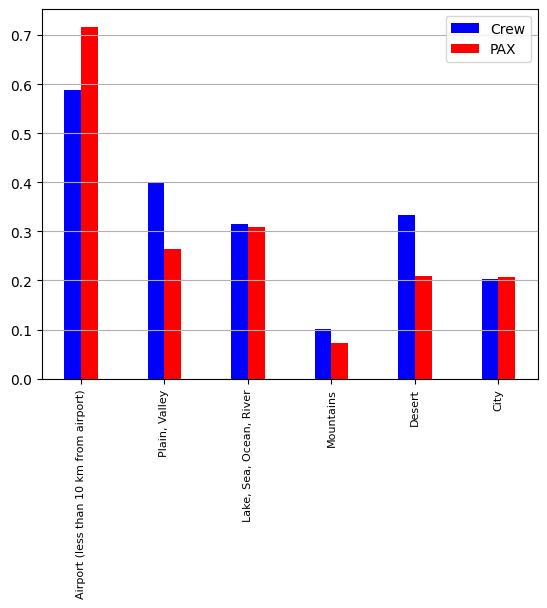

In [25]:
#survivors procentualno

reader = csv.DictReader(open(PlaneCrashes, 'rt', encoding='utf-8'))
survivors = {}
for row in reader:
    site = row['Crash site']
    survivalcrew = [row['Crew on board'], row['Crew fatalities']]
    survivalpax = [row['Pax on board'], row['PAX fatalities']]
    otherfatalities = row['Other fatalities']
    if site.strip():
        if(site not in survivors):
            survivors[site] = [[0, 0], [0, 0], 0]
        survivors[site][0][0] += int(survivalcrew[0] or 0)
        survivors[site][0][1] += int(survivalcrew[1] or 0)
        survivors[site][1][0] += int(survivalpax[0] or 0)
        survivors[site][1][1] += int(survivalpax[1] or 0)
        survivors[site][2] += int(otherfatalities or 0)
    else:
        survivors['NA'] = survivors.get('NA', 0) + 1

survivors.pop('NA')

x_axis = np.arange(len(survivors))
x = []
y = []
for i in survivors:
    """
    print(i, end=': ')
    print(survivors[i])"""
    x.append(1 - (survivors[i][0][1] / survivors[i][0][0]))
    y.append(1 - (survivors[i][1][1] / survivors[i][1][0]))
    
plt.bar(x_axis - 0.1, x, 0.2, color='b', label='Crew') 
plt.bar(x_axis + 0.1, y, 0.2, color='r', label='PAX') 
plt.xticks(x_axis, survivors, rotation=90)
plt.legend()
plt.grid(True, axis='y')
plt.show()

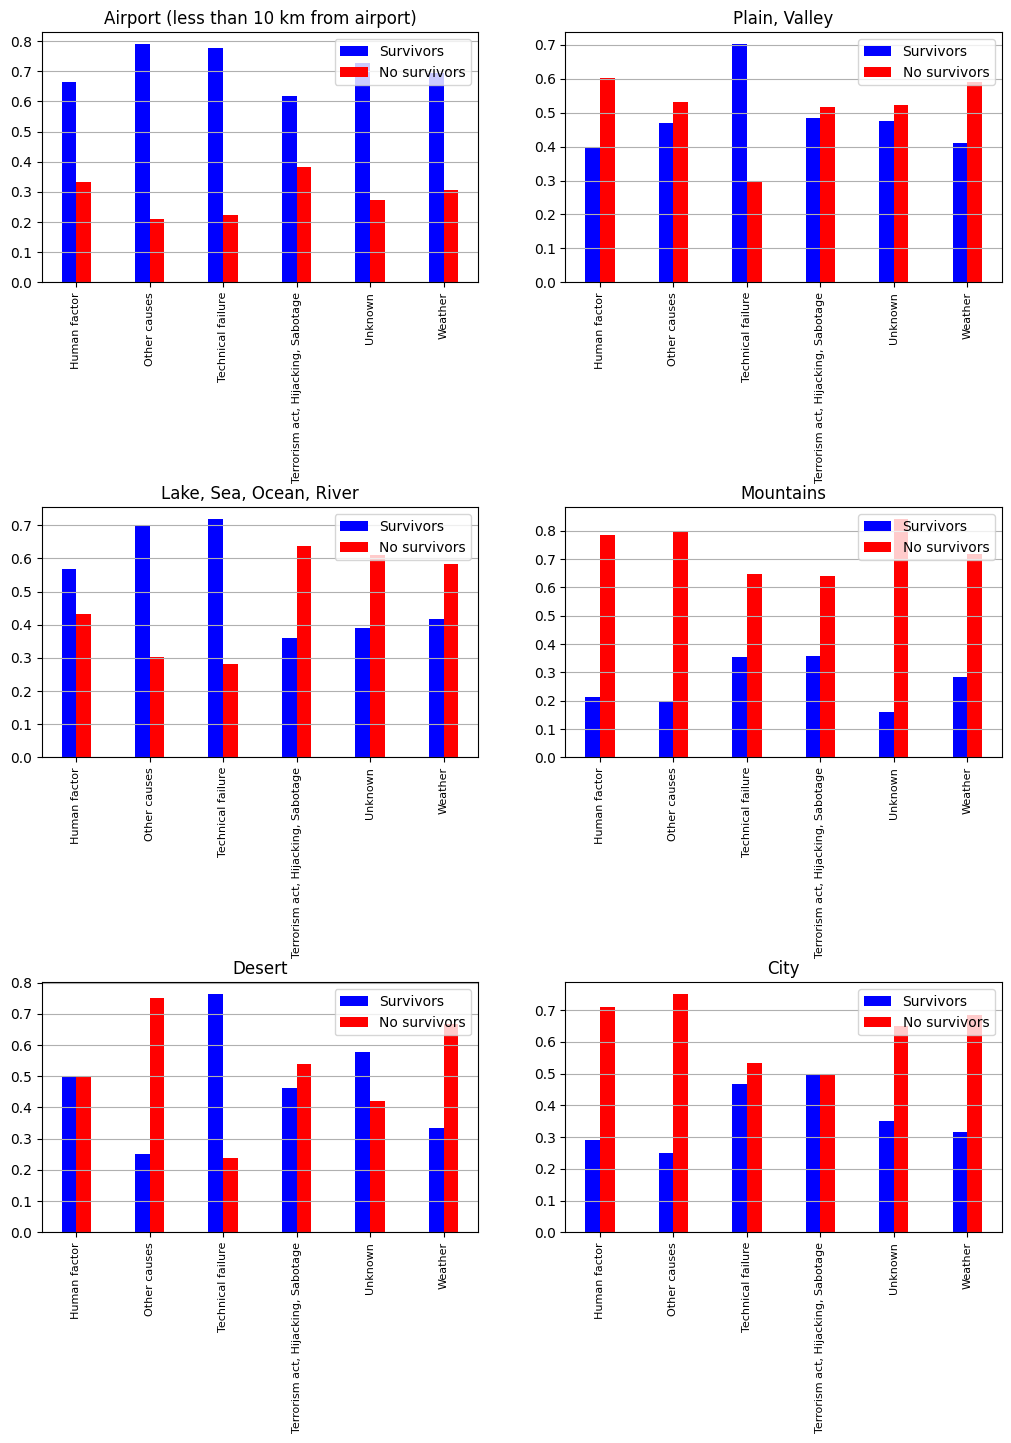

In [26]:
#survivors lokacija + vzrok
reader = csv.DictReader(open(PlaneCrashes, 'rt', encoding='utf-8'))
survivors = {}
for row in reader:
    site = row['Crash site']
    survival = row['Survivors']
    cause = row['Crash cause']
    if site.strip():
        if(survival == ''):
            survivors['NA'] += 1
            continue
        if(site not in survivors):
            survivors[site] = dict()
        if(cause not in survivors[site]):
            survivors[site][cause] = [0, 0]
        if(survival == 'Yes'):
            survivors[site][cause][0] += 1
        elif(survival == 'No'):
            survivors[site][cause][1] += 1
    else:
        survivors['NA'] = survivors.get('NA', 0) + 1

survivors.pop('NA')

ind = 1
for i in survivors:
    survivors[i] = {key: value for key, value in sorted(survivors[i].items())}
    plt.subplot(3, 2, ind)
    x_axis = np.arange(len(survivors[i]))
    x = []
    y = []
    for j in survivors[i]:
        sum = survivors[i][j][0] + survivors[i][j][1]
        x.append(survivors[i][j][0] / sum)
        y.append(survivors[i][j][1] / sum)
    plt.title(i)
    plt.bar(x_axis - 0.1, x, 0.2, color='b', label='Survivors') 
    plt.bar(x_axis + 0.1, y, 0.2, color='r', label='No survivors') 
    plt.xticks(x_axis, survivors[i], rotation=90)
    plt.legend(loc='upper right')
    plt.grid(True, axis='y')
    ind += 1

plt.subplots_adjust(left=0, bottom=0, right=1.5, top=2.5, wspace=0.2, hspace=0.9)
plt.show()

### 10. Ali ima posadka večjo možnost preživetja kot običajni potniki na komercialnih letalih?

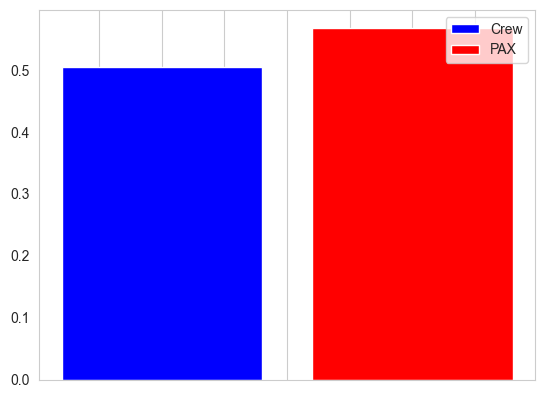

In [27]:
#survivors procentualno na komecialnih letih

reader = csv.DictReader(open(PlaneCrashes, 'rt', encoding='utf-8'))
survivors = [[0, 0], [0, 0], 0]
i = 0
for row in reader:
    if(row['Flight type'] == 'Scheduled Revenue Flight'):
        survivalcrew = [row['Crew on board'], row['Crew fatalities']]
        survivalpax = [row['Pax on board'], row['PAX fatalities']]
        otherfatalities = row['Other fatalities']
        survivors[0][0] += int(survivalcrew[0] or 0)
        survivors[0][1] += int(survivalcrew[1] or 0)
        survivors[1][0] += int(survivalpax[0] or 0)
        survivors[1][1] += int(survivalpax[1] or 0)
        survivors[2] += int(otherfatalities or 0)

"""print('Crew\t\tPAX\t\tOther')
print(survivors)
print((1 - survivors[0][1]/survivors[0][0])*100, '% ', (1 - survivors[1][1]/survivors[1][0])*100, '%')"""
plt.bar(0, 1 - survivors[0][1]/survivors[0][0], color='b', label='Crew')
plt.bar(1, 1 - survivors[1][1]/survivors[1][0], color='r', label='PAX')
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.gca().set_xticklabels([])
plt.show()

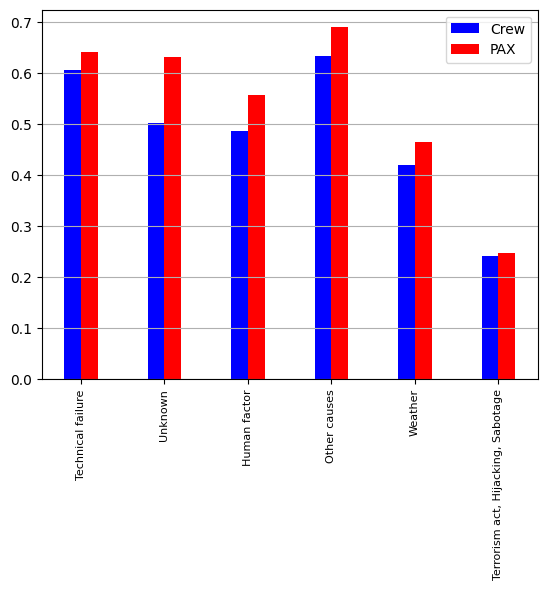

In [28]:
#survivors procentualno na komecialnih letih po razlogu

reader = csv.DictReader(open(PlaneCrashes, 'rt', encoding='utf-8'))
survivors = {}
for row in reader:
    if(row['Flight type'] == 'Scheduled Revenue Flight'):
        cause = row['Crash cause']
        if cause.strip():
            if(cause not in survivors):
                survivors[cause] = [[0, 0], [0, 0]]
            survivalcrew = [row['Crew on board'], row['Crew fatalities']]
            survivalpax = [row['Pax on board'], row['PAX fatalities']]
            survivors[cause][0][0] += int(survivalcrew[0] or 0)
            survivors[cause][0][1] += int(survivalcrew[1] or 0)
            survivors[cause][1][0] += int(survivalpax[0] or 0)
            survivors[cause][1][1] += int(survivalpax[1] or 0)

x_axis = np.arange(len(survivors))
x = []
y = []
for i in survivors:
    """
    print(i, end=': ')
    print(survivors[i])"""
    x.append(1 - (survivors[i][0][1] / survivors[i][0][0]))
    y.append(1 - (survivors[i][1][1] / survivors[i][1][0]))

plt.bar(x_axis - 0.1, x, 0.2, color='b', label='Crew') 
plt.bar(x_axis + 0.1, y, 0.2, color='r', label='PAX') 
plt.xticks(x_axis, survivors, rotation=90)
plt.legend()
plt.grid(True, axis='y')

Plain, Valley: [[2602, 1795], [15370, 11671]]
Airport (less than 10 km from airport): [[11092, 3272], [98624, 23255]]
Lake, Sea, Ocean, River: [[2217, 1440], [13421, 9451]]
Mountains: [[2838, 2613], [17168, 15945]]
City: [[368, 288], [3620, 2798]]
Desert: [[234, 175], [1621, 1460]]


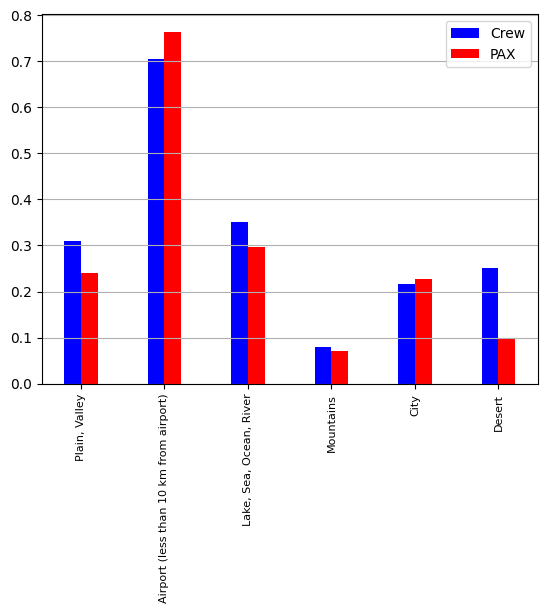

In [29]:
#survivors procentualno na komecialnih letih po lokaciji

reader = csv.DictReader(open(PlaneCrashes, 'rt', encoding='utf-8'))
survivors = {}
for row in reader:
    if(row['Flight type'] == 'Scheduled Revenue Flight'):
        site = row['Crash site']
        survivalcrew = [row['Crew on board'], row['Crew fatalities']]
        survivalpax = [row['Pax on board'], row['PAX fatalities']]
        if site.strip():
            if(site not in survivors):
                survivors[site] = [[0, 0], [0, 0]]
            survivors[site][0][0] += int(survivalcrew[0] or 0)
            survivors[site][0][1] += int(survivalcrew[1] or 0)
            survivors[site][1][0] += int(survivalpax[0] or 0)
            survivors[site][1][1] += int(survivalpax[1] or 0)

x_axis = np.arange(len(survivors))
x = []
y = []
for i in survivors:
    print(i, end=': ')
    print(survivors[i])
    x.append(1 - (survivors[i][0][1] / survivors[i][0][0]))
    y.append(1 - (survivors[i][1][1] / survivors[i][1][0]))
    
plt.bar(x_axis - 0.1, x, 0.2, color='b', label='Crew') 
plt.bar(x_axis + 0.1, y, 0.2, color='r', label='PAX') 
plt.xticks(x_axis, survivors, rotation=90)
plt.legend()
plt.grid(True, axis='y')
plt.show()